# Домашнее задание №2

SQL-инъекция (SQLi) представляет собой одну из наиболее распространенных и опасных уязвимостей веб-приложений. Она возникает, когда злоумышленник вставляет вредоносные SQL-запросы в поля ввода пользовательских данных. Эти запросы могут позволить злоумышленнику получить несанкционированный доступ к базе данных, извлечь, изменить или удалить данные, а в некоторых случаях даже получить контроль над сервером.

Обнаружение и предотвращение SQL-инъекций крайне важно, поскольку такие атаки могут нанести значительный ущерб как бизнесу, так и пользователям. Традиционные методы защиты включают использование параметризованных запросов, подготовленных выражений и тщательную проверку и экранирование входных данных. Однако, несмотря на эти меры, уязвимости все же могут возникать из-за ошибок в программировании или человеческого фактора.

С развитием технологий машинного обучения (ML) появились новые подходы к обнаружению и предотвращению SQL-инъекций. Методы машинного обучения позволяют анализировать большие объемы данных и выявлять аномалии или подозрительные шаблоны, указывающие на попытку внедрения вредоносного SQL-запроса. Системы, основанные на ML, могут обучаться на исторических данных и адаптироваться к новым видам атак, что делает их мощным инструментом для обеспечения безопасности веб-приложений.

## Подготовка виртуального окружения Python

Предварительно нужно установить все зависимые модули. Все необходимые зависимости перечислены в requirements.txt файле. Чтобы установить зависимости, выполните в терминале следующую команду:

python3 -m pip install -r requirements.txt

## Описания задания

В данном задании мы постараемся изучить возможность детектирования SQL-инъекций на основе подхода обработки естественного языка (NLP) к анализу данных. Современные методы NLP позволяют эффективно обрабатывать и анализировать текстовые данные, выявляя закономерности и аномалии, которые могут ускользнуть от традиционных методов защиты.

Используя инструменты и методы NLP, мы будем анализировать текстовые входные данные веб-приложений, чаще всего передаваемый в полезной нагрузки прикладных протоколов, чтобы обнаружить подозрительные паттерны, характерные для SQL-инъекций. Это включает в себя такие техники, как токенизация (`RegexpTokenizer`), векторизация текста (`TfidfVectorizer`, `CountVectorizer`), предобработка данных (отброс несущественных токенов на основе анализа главных компонент),обучение моделей классификации.

В рамках работы вам предоставлено два размеченных датасета (`train-dataset.tsv` и `test-dataset.csv`)  с полезной нагрузкой в виде текста и метки 0 (легитимный текст) и 1 (payload содержащий sql инъекцию) 

Для выполнения домашнего задания вам необходимо:
1. Предустановить зависимости:
```shell
$ pip install -r requirements.txt
```
2. Загрузить исходный датасет `train-dataset.tsv` при помощи модуля `pandas` и разбить его на обучающий и тестовый набор данных: 
```python
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
x_train, y_train = df_train['payload'].values, df_train['label'].values
x_test, y_test = df_test['payload'].values, df_test['label'].values
```

3. Извлечь токенезировать и векторизировать данные представленные в `train-dataset.tsv` при помощи инструментов `nltk.tokenize.RegexpTokenizer`, `sklearn.feature_extraction.text.TfidfVectorizer`, `sklearn.feature_extraction.text.CountVectorizer`

4. Выбрать ключевые, наиболее значемые токены при помощи инструментов `sklearn.feature_selection.SelectFromModel` и `sklearn.decomposition.TruncatedSVD`

5. Обучить модель на выбранных ключевых признаках

6. Протестировать обученную модель на тестовых данных из набора `train-dataset.tsv`

7. Подсчитать accuracy, построить матрицу ошибок

8. Загрузить тестовый датасет `test-dataset.tsv` при помощи модуля `pandas`:

9. Протестировать предобученную модель на новом наборе данных

10. Подсчитать accuracy, построить матрицу ошибок

11. Рассмотреть различные модели классификации, а также различные способы векторизации и токенизации данных, сравнить полученные результаты между собой

## Теоретический материал

Процесс машинного обучения моделей классификации позволяющих обнаруживать SQL инъекции можно свести к следующим этапам: 

#### 1. Предварительная обработка данных

Основная цель предварительной обработки данных — подготовить текстовые данные для дальнейшего анализа. Это включает следующие шаги:

- Токенизация: Разбиение текста на отдельные слова или фразы (токены).
- Очистка текста: Удаление лишних символов, знаков препинания, стоп-слов и приведение слов к нижнему регистру.
- Лемматизация или стемминг: Приведение слов к их начальной или базовой форме для уменьшения количества уникальных слов.


**RegexpTokenizer** (регулярный токенизатор) — это инструмент для разбиения текста на токены (слова или фразы) с использованием регулярных выражений. Регулярные выражения позволяют задавать сложные шаблоны для поиска и извлечения нужных частей текста.

#### 2. Векторизация данных

Наиболее простым споосбом векторизации является `CountVectorizer`:

`CountVectorizer` — это инструмент для преобразования текста в числовые векторы путем подсчета количества вхождений каждого слова в документ. В результате каждый документ представляется как вектор, где каждая позиция соответствует определенному слову, а значение в позиции — количество вхождений этого слова в документе.

Пример:

Документ 1: "SELECT * FROM users"
Документ 2: "DROP TABLE users"
Векторизация: [1, 1, 1, 0, 0] и [0, 0, 0, 1, 1]
где каждая позиция соответствует слову(токену) из словаря: ["SELECT", "*", "FROM", "DROP", "TABLE"].

Другим способом векторизации является `TfidfVectorizer`:

`TfidfVectorizer` (Term Frequency-Inverse Document Frequency Vectorizer) — это инструмент обработки текста, используемый для преобразования текстовых данных в числовые векторы на основе значимости слов. Этот метод учитывает как частоту появления слова в документе (term frequency, TF), так и обратную частоту появления слова во всех документах коллекции (inverse document frequency, IDF).

- TF (term frequency): измеряет частоту появления слова в документе. Обычно рассчитывается как отношение количества вхождений слова к общему количеству слов в документе: tf(t, d) = f(t, d) / sum(f(t', d) for t' in d)
- IDF (inverse document frequency): измеряет, насколько редким или распространенным является слово в коллекции документов. Рассчитывается как логарифм отношения общего количества документов к количеству документов, содержащих данное слово: idf(t) = log(N / df(t))

- Итоговый вес токена: tf-idf(t, d) = tf(t, d) * log(N / df(t))

#### 3. Отбор токенов (Отбор признаков)

Отбор токенов (или признаков) является важным шагом, который позволяет уменьшить размерность данных, улучшить производительность модели и избежать переобучения. Для этого используются различные методы, включая статистические и алгоритмические подходы:

- `SelectFromModel`: Метод для отбора признаков, основанный на важности признаков, которую определяет обученная модель. Например, можно использовать Lasso (линейная модель с L1-регуляризацией) для оценки важности признаков.

- `TruncatedSVD`: Метод понижения размерности, который применим к разреженным матрицам, например, к тем, которые получены с помощью `CountVectorizer` или `TfidfVectorizer`. `TruncatedSVD` уменьшает размерность данных, сохраняя наиболее важную информацию.

Также возможно комбинация данных методов, для повышения точности отбора признаков.

#### 4. Обучение модели

После векторизации текстовых данных их можно использовать для обучения моделей машинного обучения. Основные шаги включают:

- Разделение данных: Разделение данных на тренировочные и тестовые наборы.
- Выбор модели: Выбор алгоритма машинного обучения, такого как логистическая регрессия, случайный лес, метод опорных векторов (SVM) или нейронные сети.
- Обучение модели: Обучение модели на тренировочных данных с использованием векторизованных текстов.
- Оценка модели: Оценка точности и эффективности модели на тестовых данных с помощью метрик, таких как точность, полнота, F-мера.

#### 5. Обнаружение SQL-инъекций

После обучения модель можно использовать для классификации новых входных данных. При поступлении нового ввода текстовые данные проходят через этапы предварительной обработки и векторизации, после чего обученная модель определяет, является ли ввод подозрительным на наличие SQL-инъекций.
Преимущества подхода на основе NLP

- Адаптивность: Модели машинного обучения могут адаптироваться к новым типам атак, обучаясь на новых данных.
- Автоматизация: Системы на основе NLP могут автоматически анализировать и классифицировать большое количество входных данных, что повышает эффективность обнаружения уязвимостей.
- Точность: Использование методов векторизации, таких как TF-IDF, позволяет учитывать контекст и значимость слов, что улучшает точность классификации.

Использование методов NLP и машинного обучения для обнаружения SQL-инъекций представляет собой современный и эффективный подход, способный значительно повысить уровень безопасности веб-приложений. 

## Описание лабораторного стенда

#### Описание `FeatureExtractor` 
`FeatureExtractor` — класс, отвечающий за извлечение признаков (токенизацию и векторизацию данных) из исходных датафреймов. Имеет два метода:

`fit_extract` — анализирует предоставленные тексты и строит внутренние структуры данных, такие как словарь терминов (слов) и их IDF (inverse document frequency, обратная частота документа) значения. IDF вычисляется как логарифм отношения общего количества документов к количеству документов, содержащих данный термин, после чего преобразует текстовые данные в векторное представление на основе вычисленных векторов TF-IDF;

`extract_features` — выполняет только преобразование входных текстовых данных в соответствующие вектора TF-IDF с использованием уже обученных внутренних структур, таких как словарь терминов и IDF значения.

`FeatureExtractor` — поддерживает следующие режимы работы:

* TF-IDF ('tf-idf'):

    Описание: TF-IDF (Term Frequency-Inverse Document Frequency) — это метод вычисления веса слова в документе относительно его важности в коллекции документов.
    Применение: Каждый документ представляется в виде вектора, где каждая компонента отражает вес термина (слова), вычисленный по формуле TF-IDF. Этот метод учитывает и частоту встречаемости слова в документе (TF) и обратную частоту документа (IDF).
    Пример: Используется для извлечения ключевых признаков из текста, что полезно для задач, таких как классификация текстов, кластеризация и информационный поиск.

* TF-IDF с N-граммами ('tf-idf_ngram'):

    Описание: Этот режим также использует TF-IDF, но включает векторизацию не только отдельных слов, но и последовательностей из N смежных слов (N-грамм).
    Применение: Учитывает контекстуальные зависимости между последовательными словами, что может улучшить качество представления текста, особенно для задач, где важен порядок слов, например, в задачах машинного перевода или анализе sql запросов.

* Мешок слов ('bag_of_words'):

    Описание: Это простой метод векторизации, который представляет каждый документ в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного слова из словаря.
    Применение: Подходит для задач, где важно только наличие слова в тексте, а не его частота или важность. Обычно используется в моделях, требующих быстрое обучение и простоту интерпретации, таких как методы наивного Байеса или простые линейные модели.

* Мешок символов ('bag_of_characters'):

    Описание: Этот метод представляет текст в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного символа в тексте.
    Применение: Полезен в задачах, где важны структура или последовательность символов, таких как распознавание рукописного текста или анализ кодов программ. 

#### Описание `FeatureSelecter`
`FeatureSelecter` — класс, реализующий отбор ключевых токенов из общего набора. Отбор производится двумя комбинацией двух методов: SelectFromModel(Lasso) и TruncatedSVD.

`fit_transform` — Обучает SelectFromModel и TruncatedSVD модели на тренировочных данных. Преобразует тренировочные данные с использованием обученных моделей. Возвращает преобразованные тренировочные данные.

`transform` — выполняет только отбор токенов на основе работы предобученных моделей.


#### Описание `ModelFabric` 
`ModelFabric` — класс, предоставляющий единый интерфейс для создания моделей классификации данных

Поддерживает создание следующих моделей:
* XGBOOST
* SVC
* NU_SVC
* KNEIGHBORS
* DECISION_TREE
* RANDOM_FOREST
* ADABOOST
* BAGGING
* EXTRA_TREES
* LINEAR_SVC

In [1]:
import time
# Добавил отключение warnings для того, чтобы они не мешали выводу результатов
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [2]:
class ExtractMethods:
    TF_IDF = 'tf-idf'
    TF_IDF_NGRAM = 'tf-idf_ngram'
    BAG_OF_WORDS = 'bag_of_words'
    BAG_OF_CHAR = 'bag_of_characters'
    

class FeatureExtractor:
  def __init__(self, method, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
    self.notes = {}
    self.vectorizer = self._get_vectorizer(method, args, kwargs)

  def _get_vectorizer(self, method, *args, **kwargs):
    token = RegexpTokenizer(r'[a-zA-Z0-9]+')
    match method:
      case ExtractMethods.TF_IDF:
          return TfidfVectorizer(tokenizer = token.tokenize, *self.args, **self.kwargs)
      case ExtractMethods.TF_IDF_NGRAM:
          return TfidfVectorizer(
            lowercase=True, stop_words='english', 
            ngram_range = (1, 3),
            tokenizer = token.tokenize, analyzer='char'
          )
      case ExtractMethods.BAG_OF_WORDS:
          return CountVectorizer(analyzer='word',  **self.kwargs)
      case ExtractMethods.BAG_OF_CHAR:
          return CountVectorizer(analyzer='char', tokenizer = token.tokenize, **self.kwargs)
      case _:
          raise ValueError(f"Unknown feature extraction method: {self.method}")


  def fit_extract(self, x_train):
      return self.vectorizer.fit_transform(x_train)

  def extract_features(self, x):
      return self.vectorizer.transform(x)    

In [3]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [4]:
class FeatureSelecter:
    def __init__(self, n_components):
        self._scaler = StandardScaler(with_mean=False)
        self._lasso_selecter = SelectFromModel(Lasso(alpha=0.001, random_state=10))
        self._pca = TruncatedSVD(n_components=n_components)

    def fit_transform(self, x_train, y_train):
        self._scaler.fit(x_train)
        self._lasso_selecter.fit(self._scaler.transform(x_train), y_train)
        self._pca.fit(self._lasso_selecter.transform(self._scaler.transform(x_train)))
        
        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x_train)))
    
    def transform(self, x):
        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x)))

In [5]:
import xgboost as xgb
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
class Models:
    XGBOOST = 'XGBoost'
    SVC = 'SVC'
    NU_SVC = 'NuSVC'
    KNEIGHBORS = 'KNeighbors'
    DECISION_TREE = 'DecisionTree'
    RANDOM_FOREST = 'RandomForest'
    ADABOOST = 'AdaBoost'
    BAGGING = 'Bagging'
    EXTRA_TREES = 'ExtraTrees'
    LINEAR_SVC = 'LinearSVC'


class ModelFabric:
    @staticmethod
    def create_model(model_name, *args, **kwargs):
        match model_name:
            case Models.XGBOOST:
                return xgb.XGBClassifier(*args, **kwargs)
            case Models.SVC:
                return SVC(gamma=2, C=1, *args, **kwargs)
            case Models.NU_SVC:
                return NuSVC(*args, **kwargs)
            case Models.KNEIGHBORS:
                return KNeighborsClassifier(3, *args, **kwargs)
            case Models.DECISION_TREE:
                return DecisionTreeClassifier(max_depth=5, *args, **kwargs)
            case Models.RANDOM_FOREST:
                return RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, *args, **kwargs)
            case Models.ADABOOST:
                return AdaBoostClassifier( *args, **kwargs)
            case Models.BAGGING:
                return BaggingClassifier(*args, **kwargs)
            case Models.EXTRA_TREES:
                return ExtraTreesClassifier(*args, **kwargs)
            case Models.LINEAR_SVC:
                return LinearSVC(*args, **kwargs)
            case _:
                raise ValueError(f"Unsupported model name: {model_name}")

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score

def plot_confusion_matrix(y_expect, y_pred):
    cm = confusion_matrix(y_expect, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal','SQL-Injection'], yticklabels=['Normal','SQL-Injection'])
    plt.xlabel('Prediction',fontsize=13)
    plt.ylabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    # plt.show()
    return plt

In [8]:
def get_source_data(file_path):
    """
    функция для получения source данных для обучения и тестирвоания моделей.
    На вход функция принимает путь к файлу.
    Возвращает набор данных x_train, y_train, x_test, y_test
    """
    source_df = pd.read_csv(file_path, sep='\t', engine='python')
    # получаем наборы данных для тренировки и тестирования моделей 
    df_train, df_test = train_test_split(source_df, test_size=0.5)
    x_train, y_train = df_train['payload'].values, df_train['label'].values
    x_test, y_test = df_test['payload'].values, df_test['label'].values
    return x_train, y_train, x_test, y_test

def get_test_data(file_path, extractor, selecter):
    """
    функция для получения данных для работы с уже обученными и протестирвоанными моделями
    На вход функция принимает путь к файлу и обученные объекты extractor и selecter
    Возвращает набор данных X_test_selected, Y_test
    """
    test_df = pd.read_csv(file_path, sep=',', engine='python')
    min_class_count = test_df['label'].value_counts().min()
    test_df = test_df.groupby('label').sample(n = min_class_count)
     # получаем наборы данных для тестирования обученных моделей 
    X_test_extracted = extractor.extract_features(test_df['payload'])
    X_test_selected = selecter.transform(X_test_extracted)
    Y_test = test_df['label']
    return X_test_selected, Y_test

In [9]:
def extract_and_select_data(extract_method, x_train, y_train, x_test, y_test):
    """
    Функция для векторизации и токенизации данных из исходных датафреймов.
    На вход функция принимает режим работы экстрактора (extract_method) и набор датафреймов.
    Возвращает обученные объекты extractor и selecter,
    токенизированный и векторизированный набор данных x_train_selected,
    а также набор отобранных ключевых токенов x_test_selected
    """
    # Инициализация экстрактора для извлечения признаков из исходных датафреймов.
    extractor = FeatureExtractor(extract_method)
    # анализируем исходные тексты и строим внутренние структуры данных
    x_train_extracted = extractor.fit_extract(x_train)
    # инициализируем селектор, реализующий отбор ключевых токенов из общего набора с уменьшением размерности
    if extract_method == 'bag_of_characters':
        selecter = FeatureSelecter(n_components=int(x_train_extracted.shape[1]/2))
    else:
        selecter = FeatureSelecter(n_components=100)
    # применяем селектор на обучающем наборе данных
    x_train_selected = selecter.fit_transform(x_train_extracted, y_train)
    # преобразование тестового набора данных на основе обученных экстрактора и селектора
    x_test_extracted = extractor.extract_features(x_test)
    x_test_selected = selecter.transform(x_test_extracted)
    return extractor, selecter, x_train_selected, x_test_selected


In [10]:
def train_model(model_name, x_train_selected, y_train):
    """
    функция для обучения моделей на тренировочных данных
    из datasets/train-dataset.tsv
    На вход функция принимает Имя модели, и тренировочные данные.
    Возвращает обученную модель в виде объекта model
    """
    model = ModelFabric.create_model(model_name)
    model.fit(x_train_selected, y_train) 
    return model

def run_model(model, x_test_selected, y_test):
    """
    функция для тестирования обученных моделей на тестовых данных
    из datasets/train-dataset.tsv и datasets/test-dataset.csv
    На вход функция принимает обученную модель в виде объекта model
    и тренировочные/тестовые данные.
    После рассчета предсказания y_pred функция производит рассчет метрик accuracy, recall, precision, f1
    строит матрицу ошибок plt и возвращает значения метрик accuracy, recall, precision, f1 и объект матрицы ошибок plt
    """
    y_pred = model.predict(x_test_selected)
    accuracy, recall, precision, f1 = get_metrics(y_test, y_pred)
    plt = plot_confusion_matrix(y_test, y_pred)
    return accuracy, recall, precision, f1, plt

In [11]:
def get_metrics(y_test, y_pred):
    """
    Функция для рассчета метрик accuracy, recall, precision, f1
    На вход принимает данные y_test, y_pred
    Возвращает значения метрик accuracy, recall, precision, f1 
    """
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, recall, precision, f1



In [12]:
import pickle

def dump_model(model, model_name):
    """
    Функция для сохранения обученной модели в файл с расширением .pkl
    На вход функция получает обученную модель в виде объекта model и имя модели.
    Затем формирует дамп модели в виде pickle файла с именем model_name_save_hw2.pkl
    """
    file_name = f'{model_name}_save_hw2.pkl'
    with open(file_name, 'wb') as model_file:
        pickle.dump(model, model_file)
        print(f'Дамп модели {model_name} сохранен в {file_name}')

def load_model(model_name):
    """
    Функция для получения обученной модели из дампа в виде файла pickle.
    """
    file_name = f'{model_name}_save_hw2.pkl'
    with open(file_name, 'rb') as model_file:
        model = pickle.load(model_file)
        print(f'Модель {model_name} загружена из дампа {file_name}')
    return model  # Возвращаем загруженную модель

============================   Режим работы класса FeatureExtractor:	tf-idf    ==========================
=========================   Вывод метрик для тестового датасета из файла train-dataset.tsv  ========================
Model_name: XGBoost:
accuracy: 0.9873244037896113
recall: 0.987924396219811
precision: 0.9783362218370883
f1 0.9831069313827935



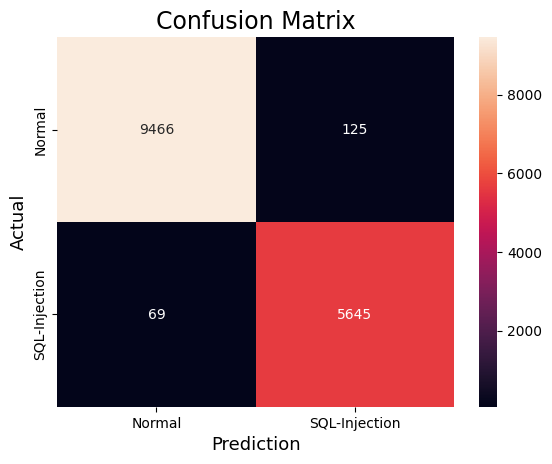

Model_name: SVC:
accuracy: 0.9451159751715126
recall: 0.9917745887294365
precision: 0.8772445820433437
f1 0.9310004928536225



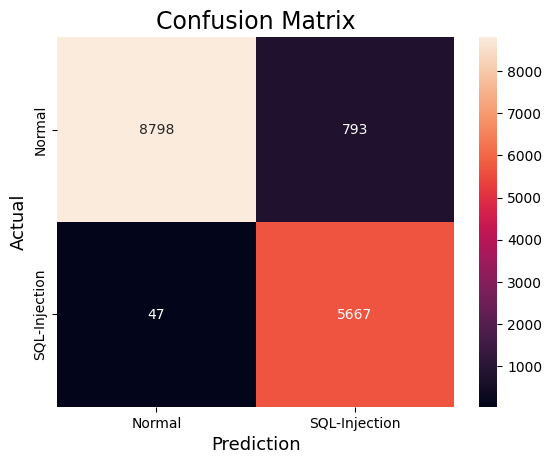

Model_name: NuSVC:
accuracy: 0.8918654034629206
recall: 0.7352117605880294
precision: 0.9673037071148975
f1 0.8354380033807298



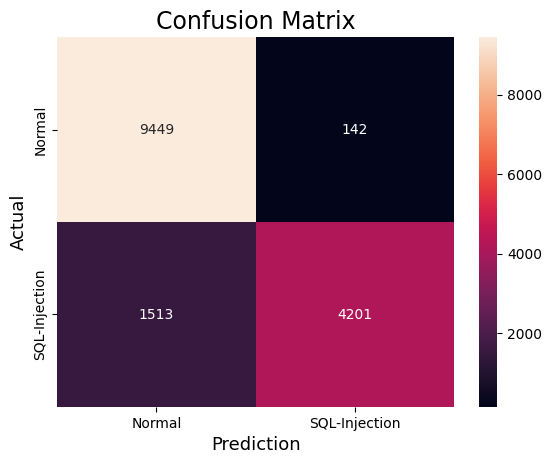

Model_name: KNeighbors:
accuracy: 0.9782424044429925
recall: 0.9579978998949947
precision: 0.9832944135081731
f1 0.9704813403067104



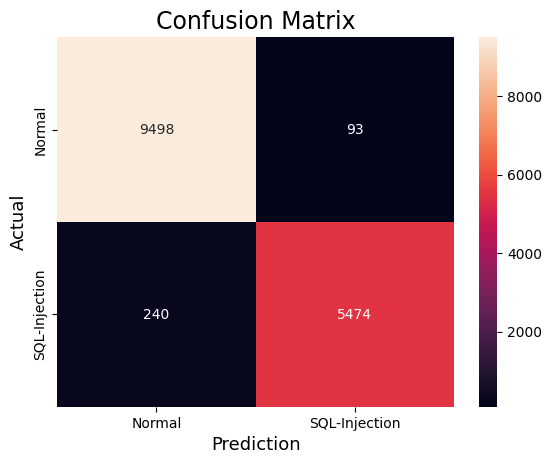

Model_name: DecisionTree:
accuracy: 0.9565501470107808
recall: 0.9441722086104305
precision: 0.9397317540498171
f1 0.9419467481449149



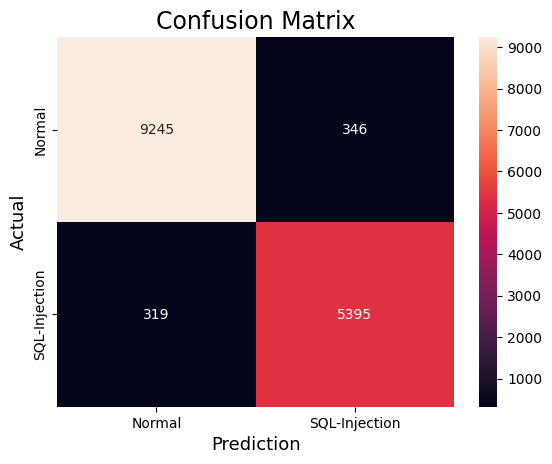

Model_name: RandomForest:
accuracy: 0.9551127082652728
recall: 0.9385719285964298
precision: 0.9410422881207229
f1 0.9398054849732761



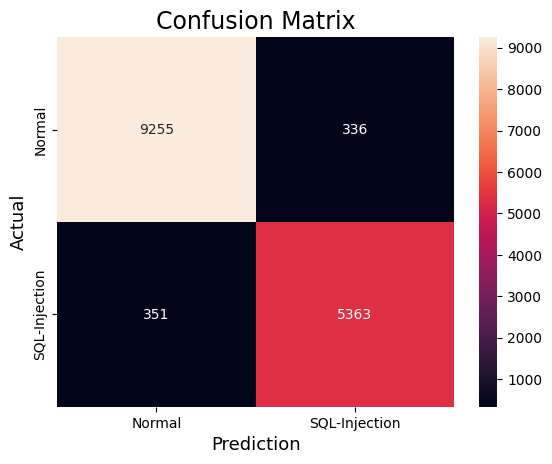

Model_name: AdaBoost:
accuracy: 0.9805292388108461
recall: 0.9786489324466223
precision: 0.9694868238557559
f1 0.9740463333913952



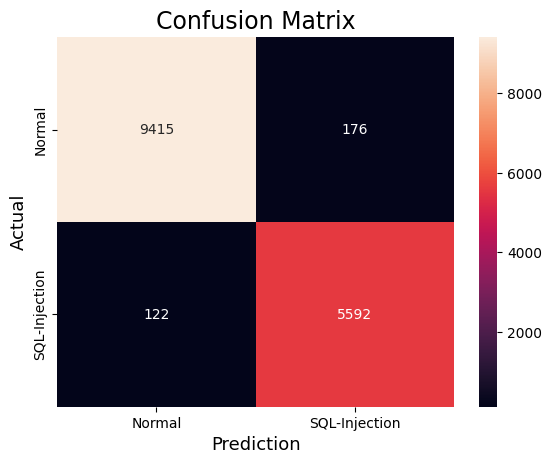

Model_name: Bagging:
accuracy: 0.9818360013067625
recall: 0.9795239761988099
precision: 0.9720389023966655
f1 0.9757670850767085



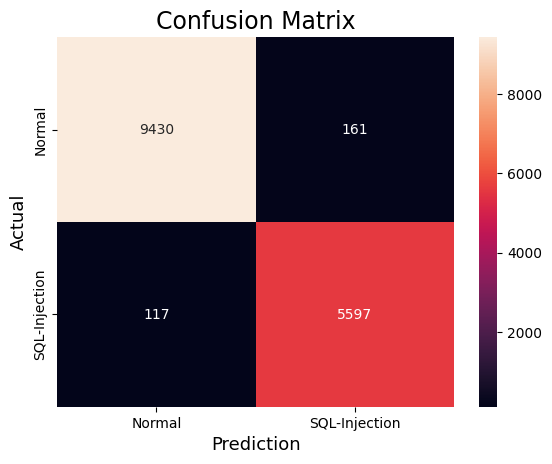

Model_name: ExtraTrees:
accuracy: 0.9870630512904279
recall: 0.9868743437171859
precision: 0.9786532454009025
f1 0.9827466016033461



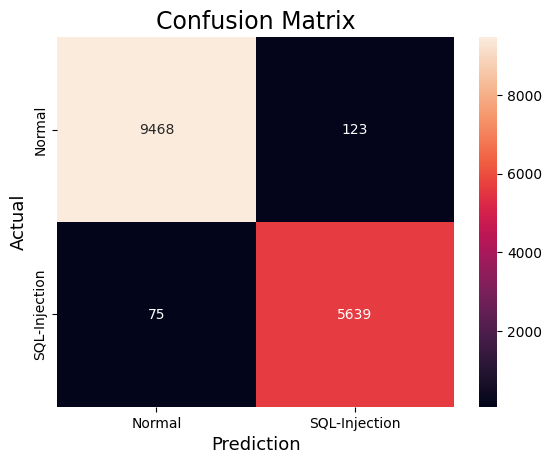

Model_name: LinearSVC:
accuracy: 0.9626919307415878
recall: 0.944347217360868
precision: 0.9552133120906355
f1 0.9497491859544135



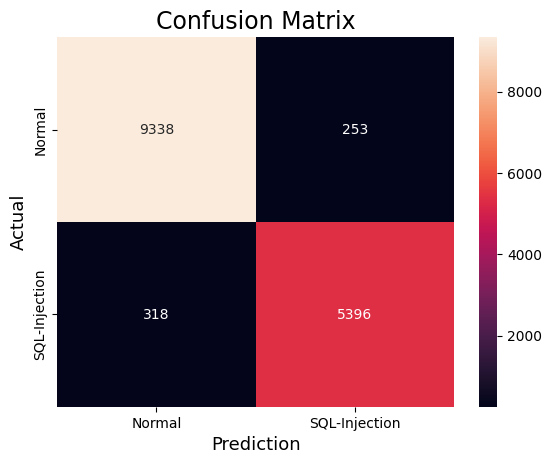

=========================   Вывод метрик для тестового датасета из файла  test-dataset.сsv  =======================
Model_name: XGBoost:
accuracy: 0.9907851087357169
recall: 0.9966826391448581
precision: 0.985063752276867
f1 0.9908391352143643



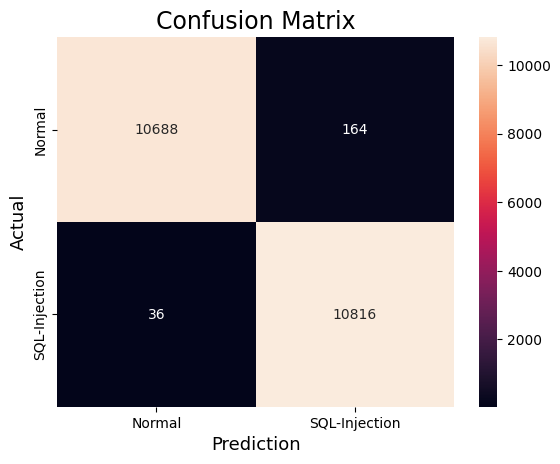

Model_name: SVC:
accuracy: 0.9843807593070402
recall: 0.9993549576115002
precision: 0.9702961438668695
f1 0.9846111943347405



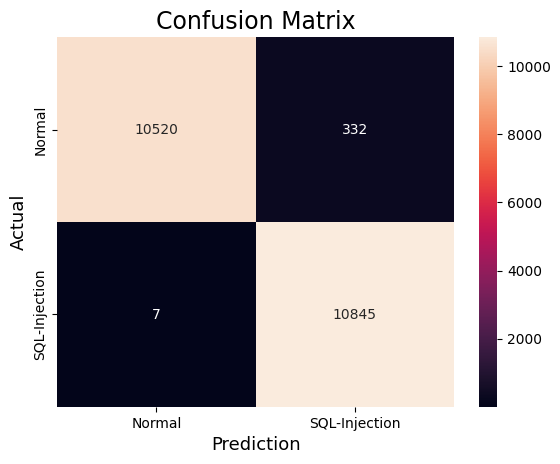

Model_name: NuSVC:
accuracy: 0.8721433837080722
recall: 0.7527644673792849
precision: 0.9888633337368358
f1 0.8548108617171558



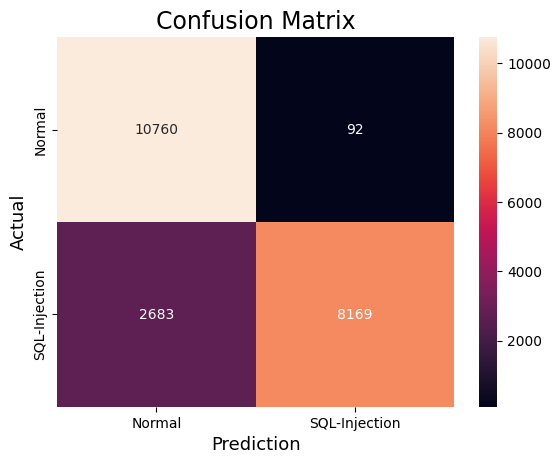

Model_name: KNeighbors:
accuracy: 0.9796350903059344
recall: 0.9721710283818651
precision: 0.9869036482694107
f1 0.9794819422523443



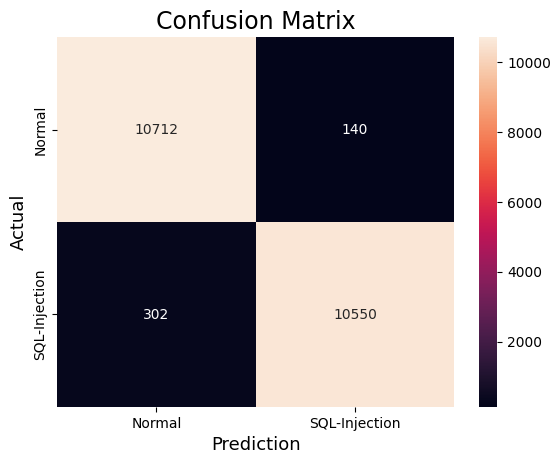

Model_name: DecisionTree:
accuracy: 0.9671489126428308
recall: 0.9546627349797272
precision: 0.9791135053397599
f1 0.9667335417347082



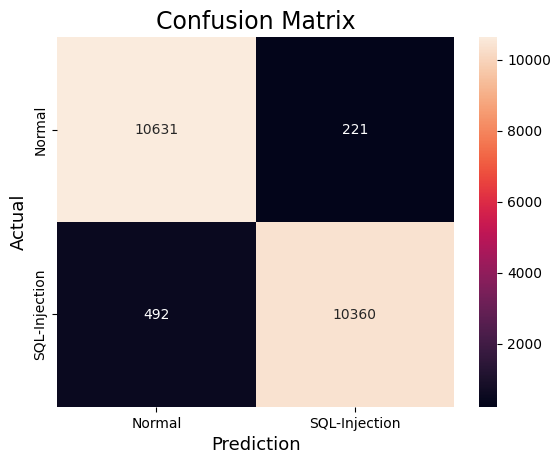

Model_name: RandomForest:
accuracy: 0.9655363066715813
recall: 0.9634168816807962
precision: 0.967518045530261
f1 0.9654631083202512



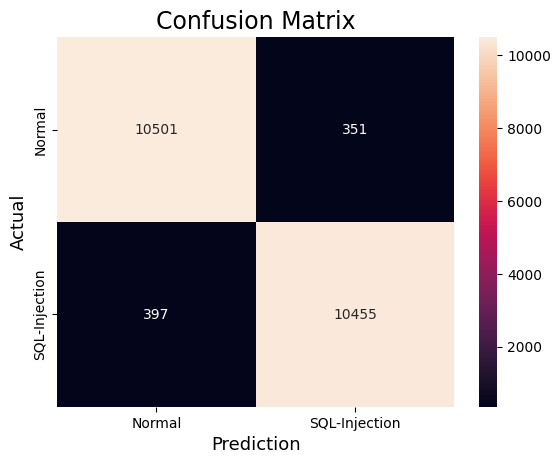

Model_name: AdaBoost:
accuracy: 0.9827681533357906
recall: 0.9843346848507187
precision: 0.9812603343744258
f1 0.982795105345478



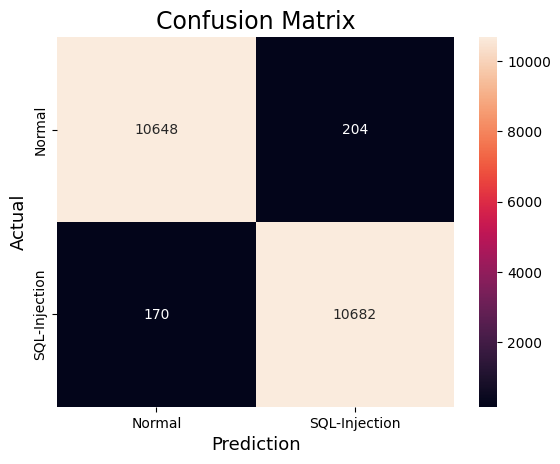

Model_name: Bagging:
accuracy: 0.9849797272392186
recall: 0.9856247696277184
precision: 0.9843548683968342
f1 0.9849894097062345



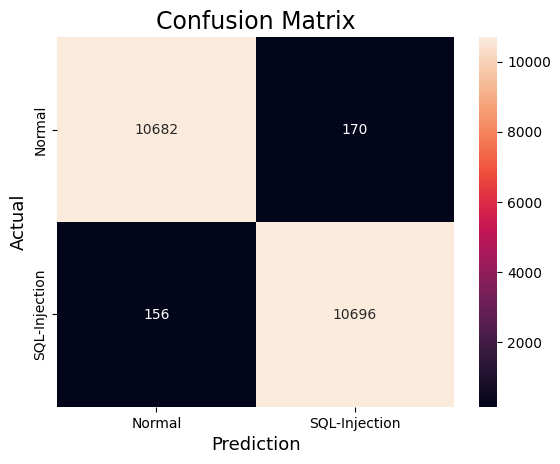

Model_name: ExtraTrees:
accuracy: 0.9906008109104313
recall: 0.9972355326207151
precision: 0.9841760640232812
f1 0.9906627608934456



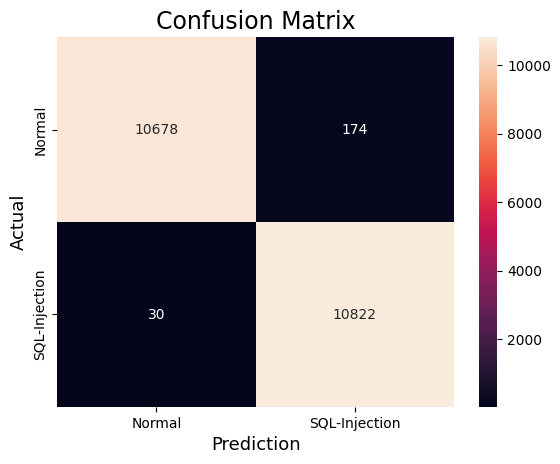

Model_name: LinearSVC:
accuracy: 0.9679782528566163
recall: 0.9475672687062293
precision: 0.9878950907868191
f1 0.9673110389915808



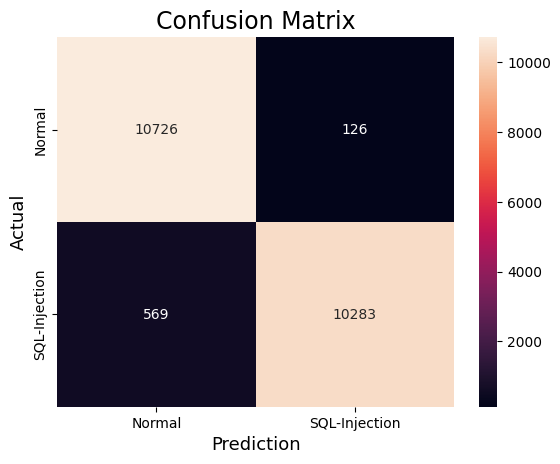

Дамп модели tf-idf_XGBoost сохранен в tf-idf_XGBoost_save_hw2.pkl
Дамп модели tf-idf_SVC сохранен в tf-idf_SVC_save_hw2.pkl
Дамп модели tf-idf_NuSVC сохранен в tf-idf_NuSVC_save_hw2.pkl
Дамп модели tf-idf_KNeighbors сохранен в tf-idf_KNeighbors_save_hw2.pkl
Дамп модели tf-idf_DecisionTree сохранен в tf-idf_DecisionTree_save_hw2.pkl
Дамп модели tf-idf_RandomForest сохранен в tf-idf_RandomForest_save_hw2.pkl
Дамп модели tf-idf_AdaBoost сохранен в tf-idf_AdaBoost_save_hw2.pkl
Дамп модели tf-idf_Bagging сохранен в tf-idf_Bagging_save_hw2.pkl
Дамп модели tf-idf_ExtraTrees сохранен в tf-idf_ExtraTrees_save_hw2.pkl
Дамп модели tf-idf_LinearSVC сохранен в tf-idf_LinearSVC_save_hw2.pkl
Модель tf-idf_XGBoost загружена из дампа tf-idf_XGBoost_save_hw2.pkl
Модель tf-idf_SVC загружена из дампа tf-idf_SVC_save_hw2.pkl
Модель tf-idf_NuSVC загружена из дампа tf-idf_NuSVC_save_hw2.pkl
Модель tf-idf_KNeighbors загружена из дампа tf-idf_KNeighbors_save_hw2.pkl
Модель tf-idf_DecisionTree загружена из дамп

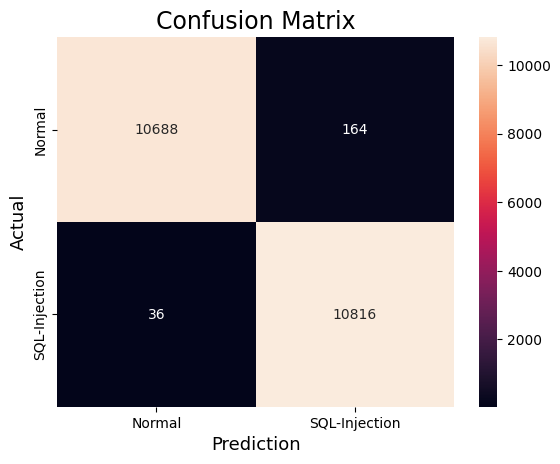

Model_name: SVC:
accuracy: 0.9843807593070402
recall: 0.9993549576115002
precision: 0.9702961438668695
f1 0.9846111943347405



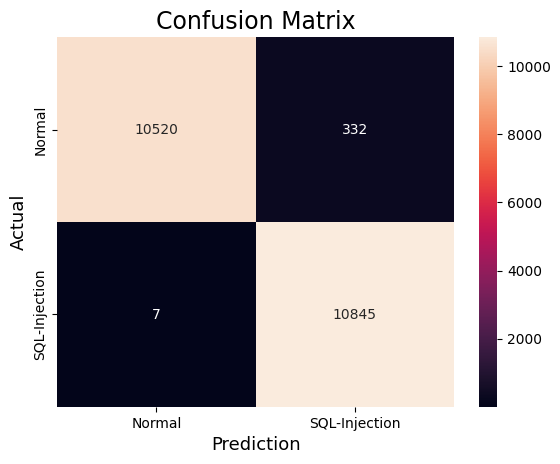

Model_name: NuSVC:
accuracy: 0.8721433837080722
recall: 0.7527644673792849
precision: 0.9888633337368358
f1 0.8548108617171558



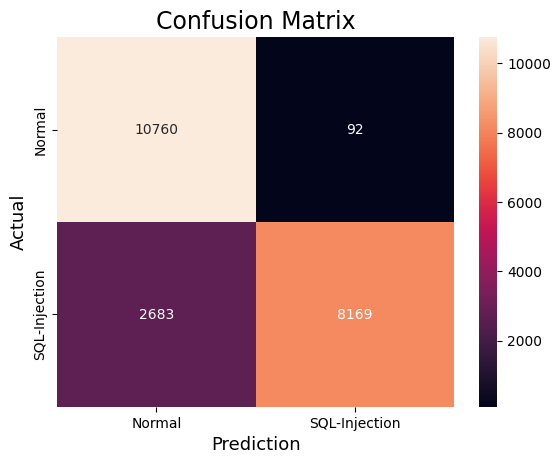

Model_name: KNeighbors:
accuracy: 0.9796350903059344
recall: 0.9721710283818651
precision: 0.9869036482694107
f1 0.9794819422523443



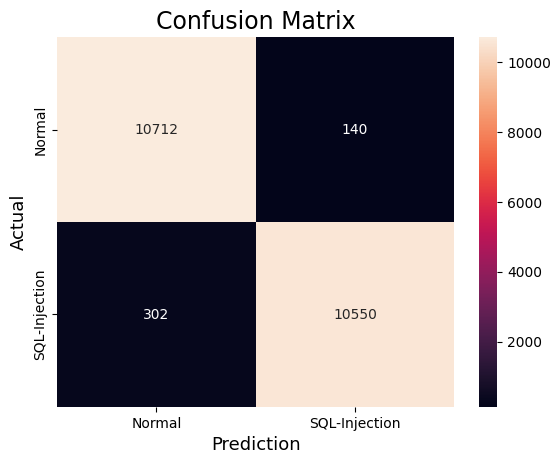

Model_name: DecisionTree:
accuracy: 0.9671489126428308
recall: 0.9546627349797272
precision: 0.9791135053397599
f1 0.9667335417347082



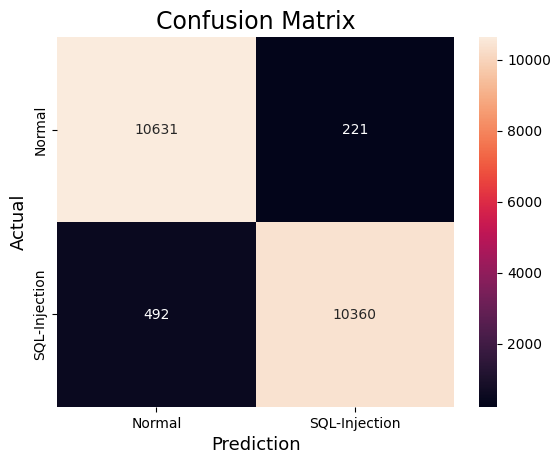

Model_name: RandomForest:
accuracy: 0.9655363066715813
recall: 0.9634168816807962
precision: 0.967518045530261
f1 0.9654631083202512



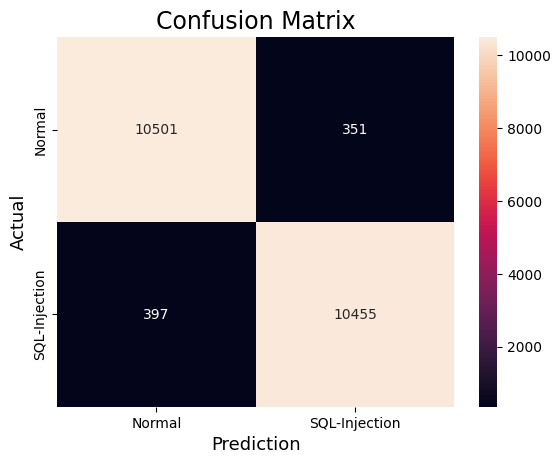

Model_name: AdaBoost:
accuracy: 0.9827681533357906
recall: 0.9843346848507187
precision: 0.9812603343744258
f1 0.982795105345478



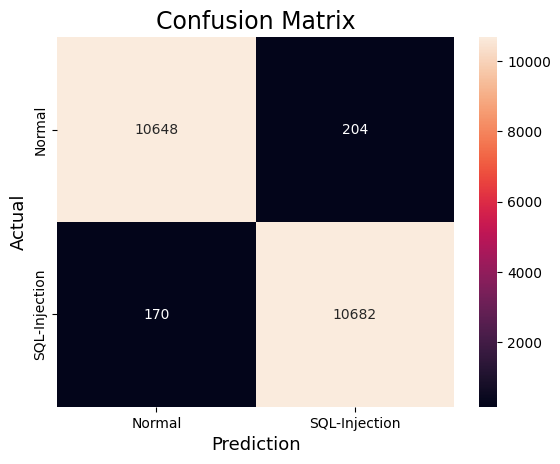

Model_name: Bagging:
accuracy: 0.9849797272392186
recall: 0.9856247696277184
precision: 0.9843548683968342
f1 0.9849894097062345



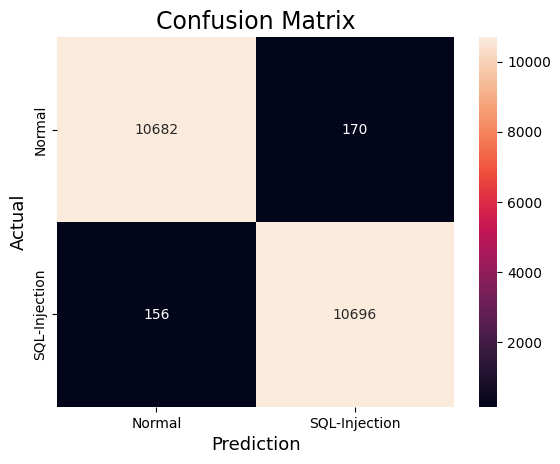

Model_name: ExtraTrees:
accuracy: 0.9906008109104313
recall: 0.9972355326207151
precision: 0.9841760640232812
f1 0.9906627608934456



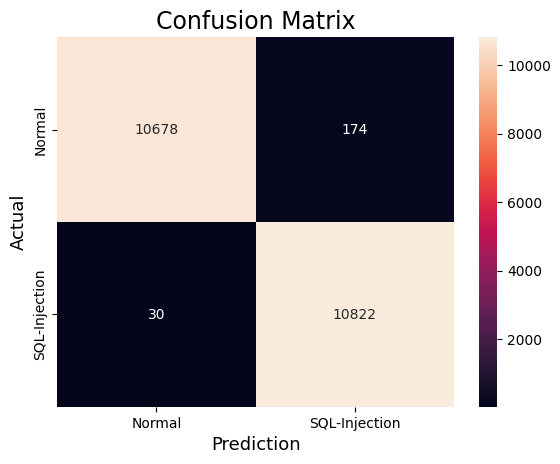

Model_name: LinearSVC:
accuracy: 0.9679782528566163
recall: 0.9475672687062293
precision: 0.9878950907868191
f1 0.9673110389915808



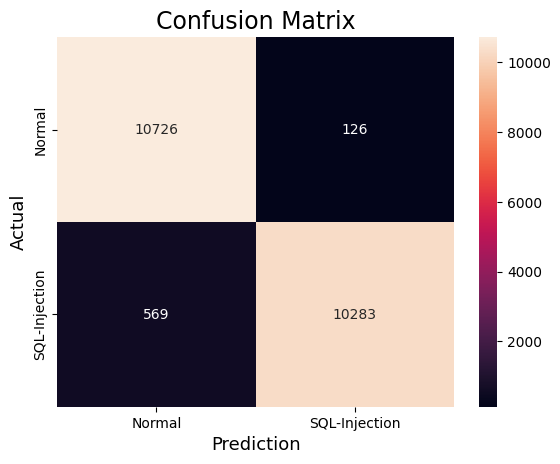

============================   Режим работы класса FeatureExtractor:	tf-idf_ngram    ==========================
=========================   Вывод метрик для тестового датасета из файла train-dataset.tsv  ========================
Model_name: XGBoost:
accuracy: 0.9945115975171512
recall: 0.9909622541201488
precision: 0.9941333333333333
f1 0.9925452609158679



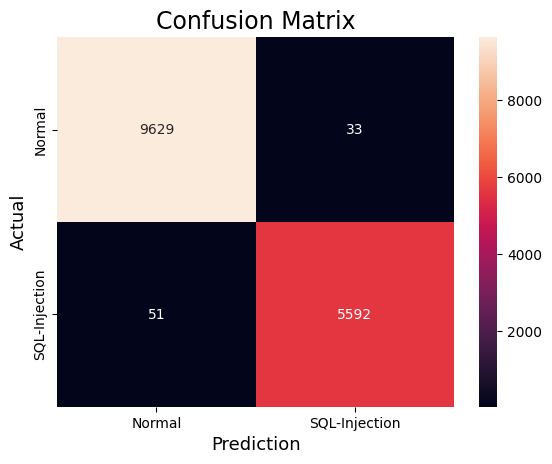

Model_name: SVC:
accuracy: 0.6563214635739955
recall: 0.06787169945064682
precision: 1.0
f1 0.12711583139727847



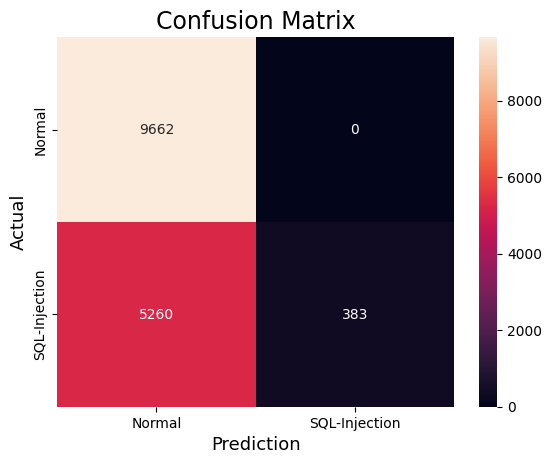

Model_name: NuSVC:
accuracy: 0.9394968964390722
recall: 0.9440014176856282
precision: 0.8972545056425805
f1 0.920034542314335



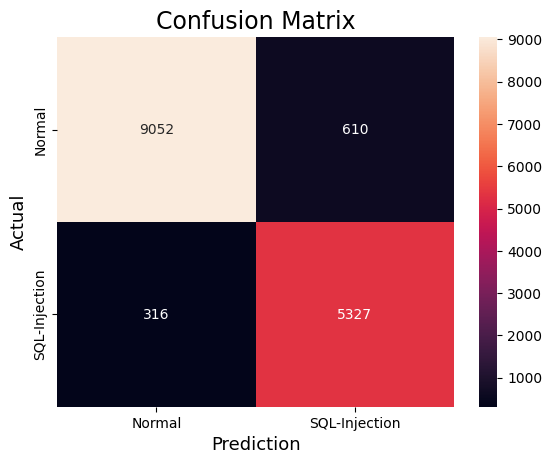

Model_name: KNeighbors:
accuracy: 0.9905259719046063
recall: 0.9826333510544036
precision: 0.9915951359084406
f1 0.9870939029817535



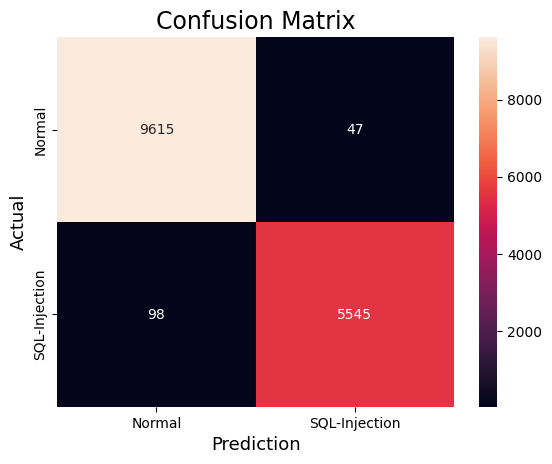

Model_name: DecisionTree:
accuracy: 0.9886311662855276
recall: 0.9796207690944533
precision: 0.9894397708967245
f1 0.9845057880676759



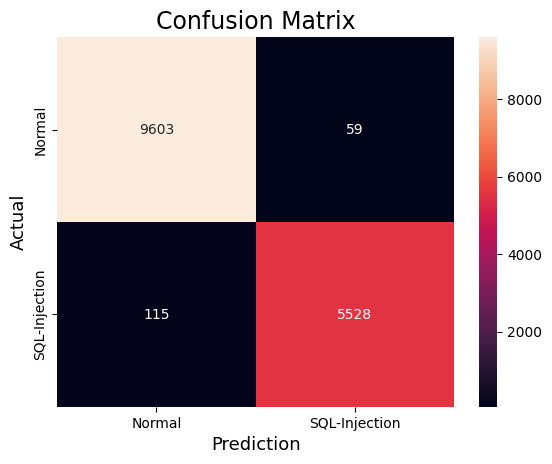

Model_name: RandomForest:
accuracy: 0.9295001633453119
recall: 0.8497253234095339
precision: 0.9540389972144847
f1 0.8988658730902616



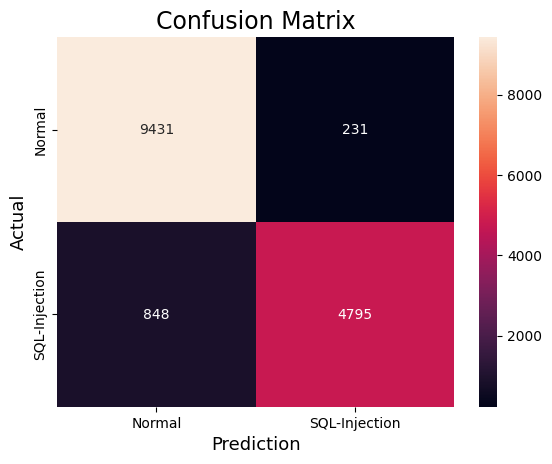

Model_name: AdaBoost:
accuracy: 0.9910486769029729
recall: 0.987418040049619
precision: 0.9882937211777226
f1 0.9878556865526106



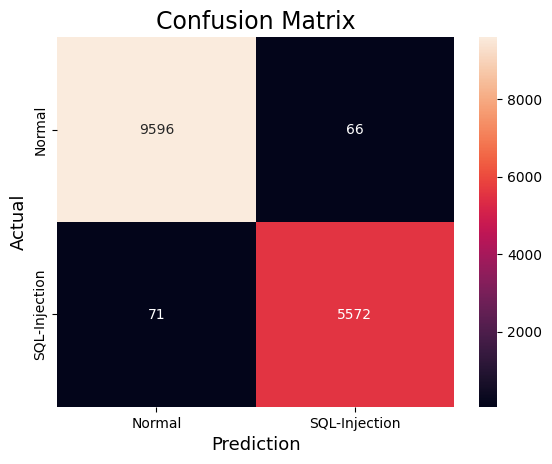

Model_name: Bagging:
accuracy: 0.9918327344005227
recall: 0.9858231437178806
precision: 0.9919757489300999
f1 0.9888898764554261



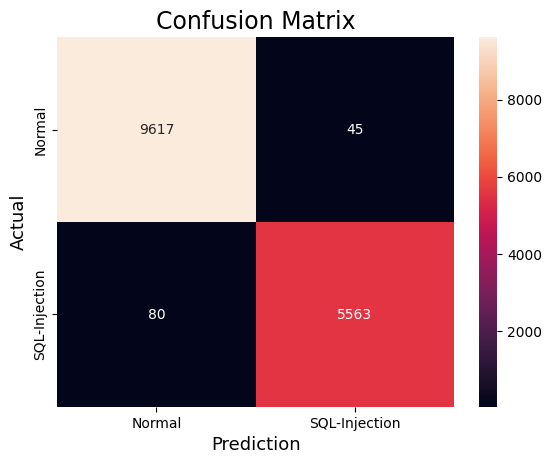

Model_name: ExtraTrees:
accuracy: 0.9926167918980725
recall: 0.9900762006025164
precision: 0.989900779588944
f1 0.9899884823247984



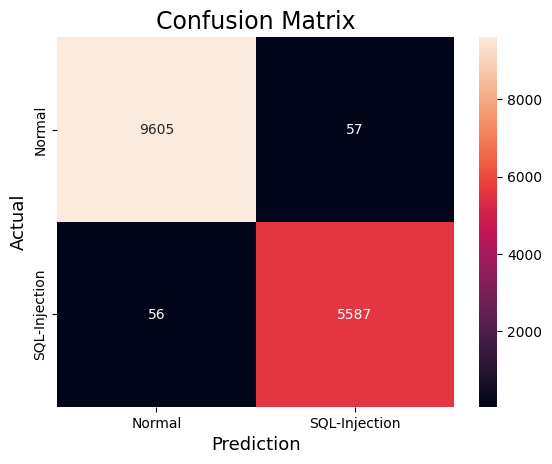

Model_name: LinearSVC:
accuracy: 0.9936622018948056
recall: 0.9904306220095693
precision: 0.9923650568181818
f1 0.9913968957871397



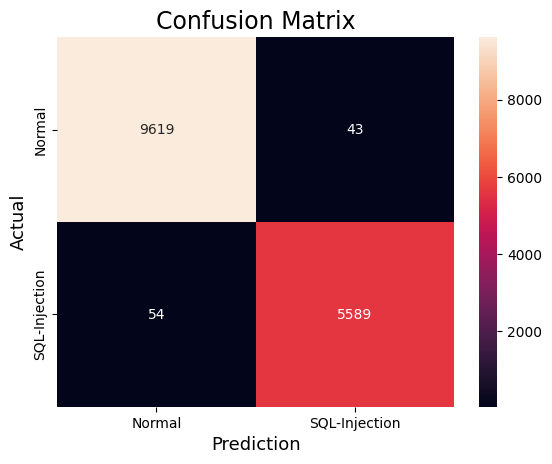

=========================   Вывод метрик для тестового датасета из файла  test-dataset.сsv  =======================
Model_name: XGBoost:
accuracy: 0.9924437891632879
recall: 0.9908772576483598
precision: 0.9939914956553891
f1 0.9924319335486849



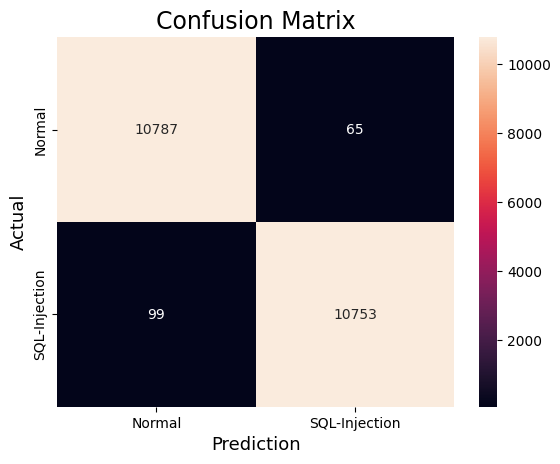

Model_name: SVC:
accuracy: 0.5211481754515297
recall: 0.042296350903059346
precision: 1.0
f1 0.08115993280877022



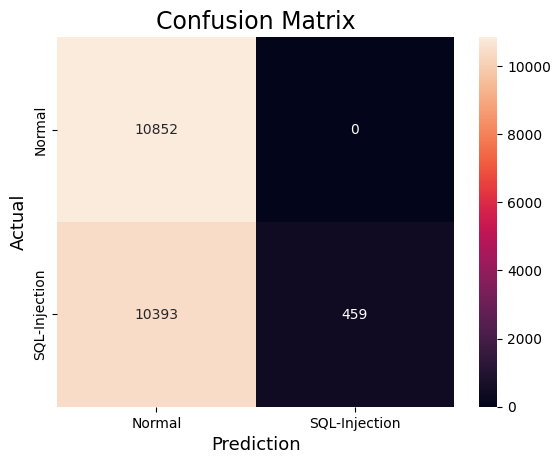

Model_name: NuSVC:
accuracy: 0.9107998525617398
recall: 0.8363435311463324
precision: 0.9826764833261152
f1 0.9036240541616886



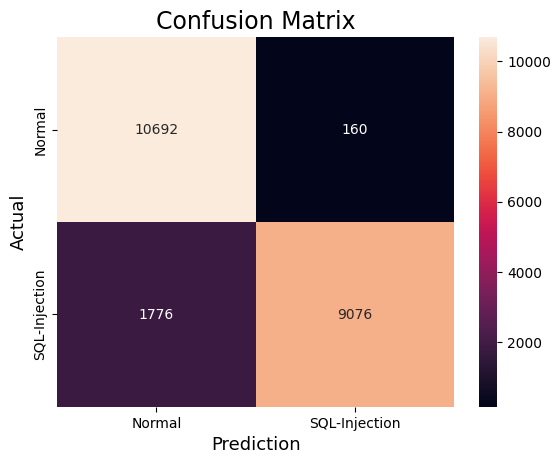

Model_name: KNeighbors:
accuracy: 0.954294139329156
recall: 0.9139329155915961
precision: 0.9941860465116279
f1 0.9523718071826388



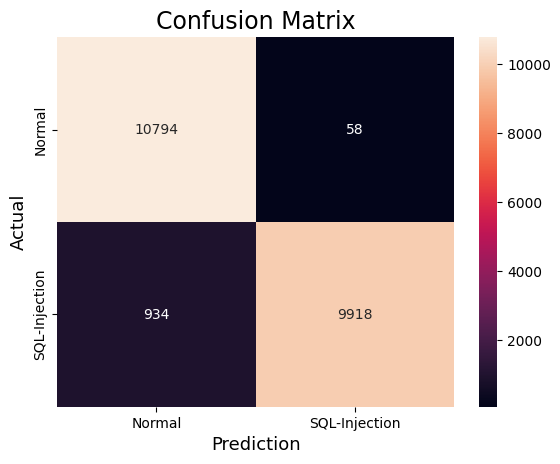

Model_name: DecisionTree:
accuracy: 0.958302617029119
recall: 0.9252672318466643
precision: 0.9907252096694623
f1 0.9568780673750417



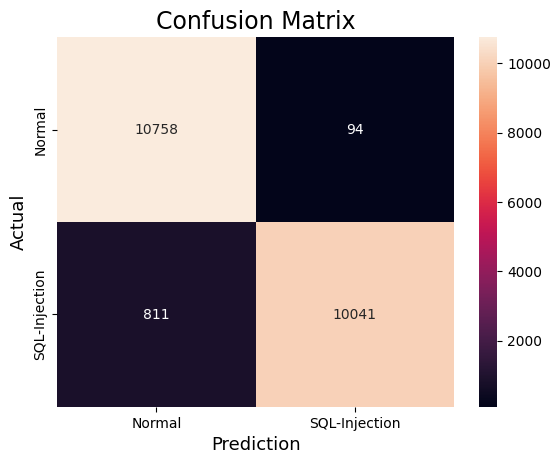

Model_name: RandomForest:
accuracy: 0.8546350903059344
recall: 0.7238297088094361
precision: 0.9802820416822663
f1 0.8327590776570368



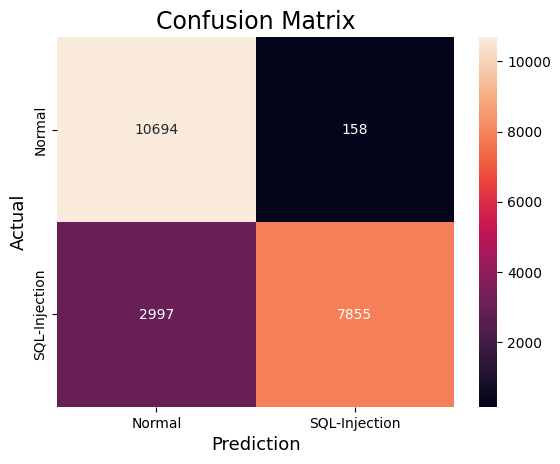

Model_name: AdaBoost:
accuracy: 0.9527276078142278
recall: 0.917250276446738
precision: 0.9873041063281095
f1 0.9509888220120378



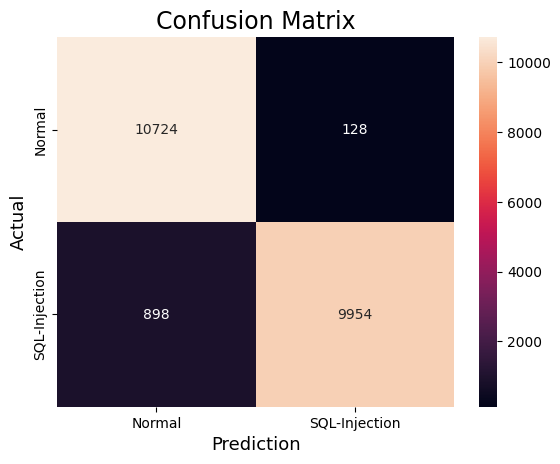

Model_name: Bagging:
accuracy: 0.963509030593439
recall: 0.9335606339845189
precision: 0.9930405802783768
f1 0.9623824451410659



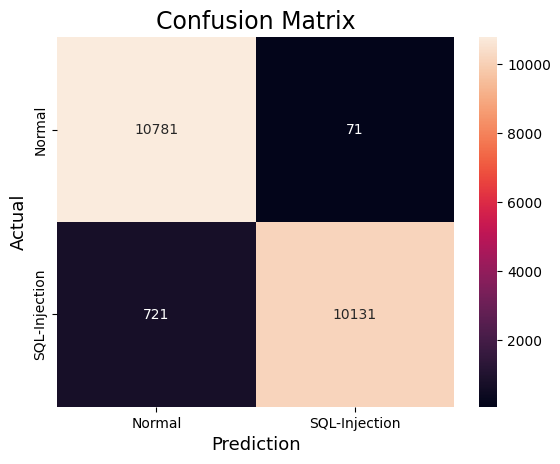

Model_name: ExtraTrees:
accuracy: 0.9868687799483966
recall: 0.9813859196461482
precision: 0.9922668405851114
f1 0.9867963863794301



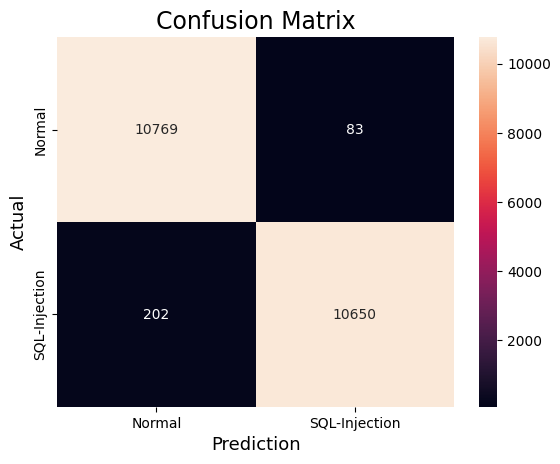

Model_name: LinearSVC:
accuracy: 0.9723553262071507
recall: 0.9514375230372282
precision: 0.9929794191190614
f1 0.971764705882353



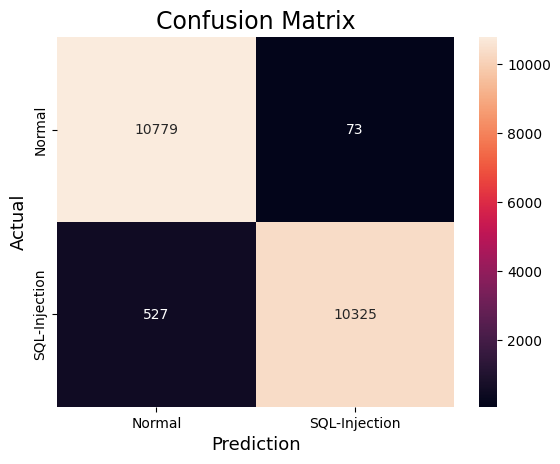

Дамп модели tf-idf_ngram_XGBoost сохранен в tf-idf_ngram_XGBoost_save_hw2.pkl
Дамп модели tf-idf_ngram_SVC сохранен в tf-idf_ngram_SVC_save_hw2.pkl
Дамп модели tf-idf_ngram_NuSVC сохранен в tf-idf_ngram_NuSVC_save_hw2.pkl
Дамп модели tf-idf_ngram_KNeighbors сохранен в tf-idf_ngram_KNeighbors_save_hw2.pkl
Дамп модели tf-idf_ngram_DecisionTree сохранен в tf-idf_ngram_DecisionTree_save_hw2.pkl
Дамп модели tf-idf_ngram_RandomForest сохранен в tf-idf_ngram_RandomForest_save_hw2.pkl
Дамп модели tf-idf_ngram_AdaBoost сохранен в tf-idf_ngram_AdaBoost_save_hw2.pkl
Дамп модели tf-idf_ngram_Bagging сохранен в tf-idf_ngram_Bagging_save_hw2.pkl
Дамп модели tf-idf_ngram_ExtraTrees сохранен в tf-idf_ngram_ExtraTrees_save_hw2.pkl
Дамп модели tf-idf_ngram_LinearSVC сохранен в tf-idf_ngram_LinearSVC_save_hw2.pkl
Модель tf-idf_ngram_XGBoost загружена из дампа tf-idf_ngram_XGBoost_save_hw2.pkl
Модель tf-idf_ngram_SVC загружена из дампа tf-idf_ngram_SVC_save_hw2.pkl
Модель tf-idf_ngram_NuSVC загружена из д

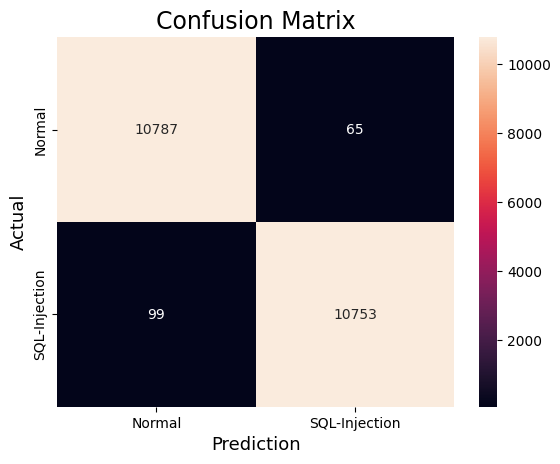

Model_name: SVC:
accuracy: 0.5211481754515297
recall: 0.042296350903059346
precision: 1.0
f1 0.08115993280877022



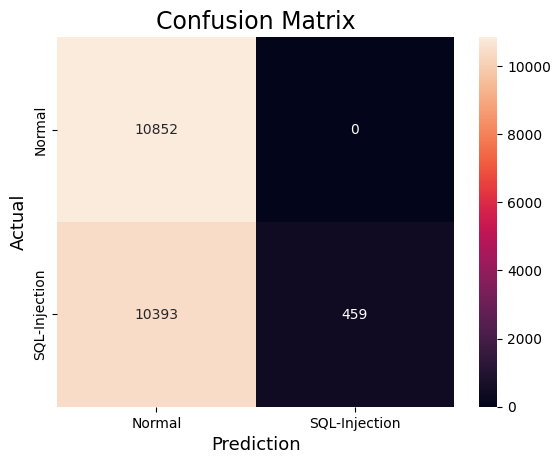

Model_name: NuSVC:
accuracy: 0.9107998525617398
recall: 0.8363435311463324
precision: 0.9826764833261152
f1 0.9036240541616886



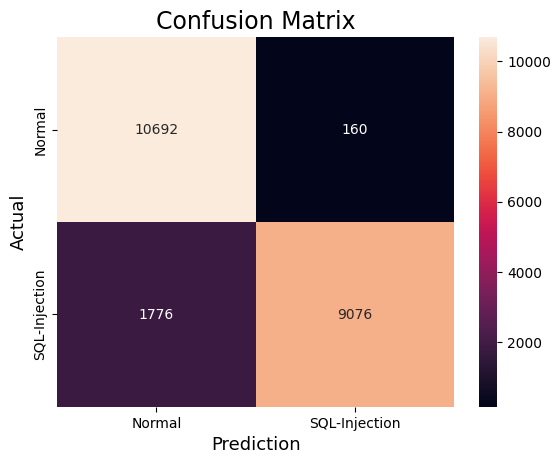

Model_name: KNeighbors:
accuracy: 0.954294139329156
recall: 0.9139329155915961
precision: 0.9941860465116279
f1 0.9523718071826388



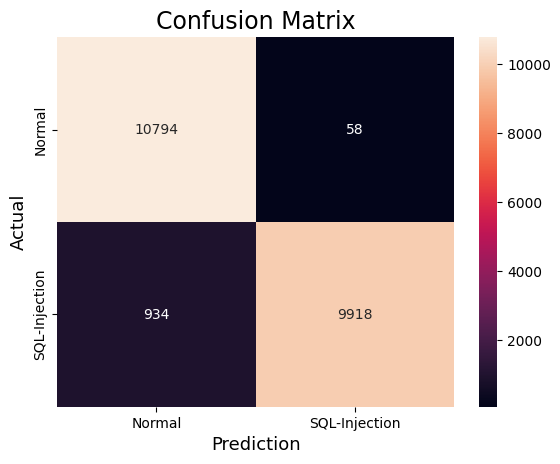

Model_name: DecisionTree:
accuracy: 0.958302617029119
recall: 0.9252672318466643
precision: 0.9907252096694623
f1 0.9568780673750417



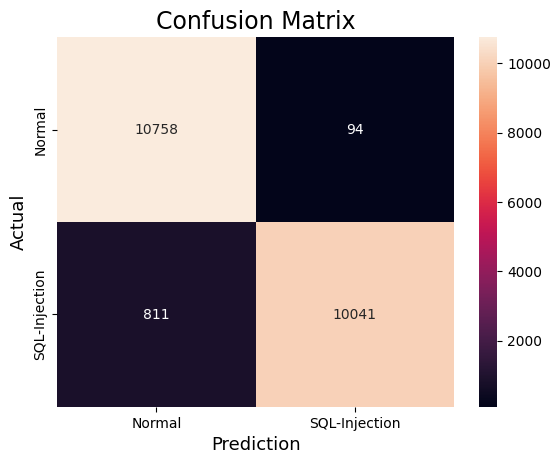

Model_name: RandomForest:
accuracy: 0.8546350903059344
recall: 0.7238297088094361
precision: 0.9802820416822663
f1 0.8327590776570368



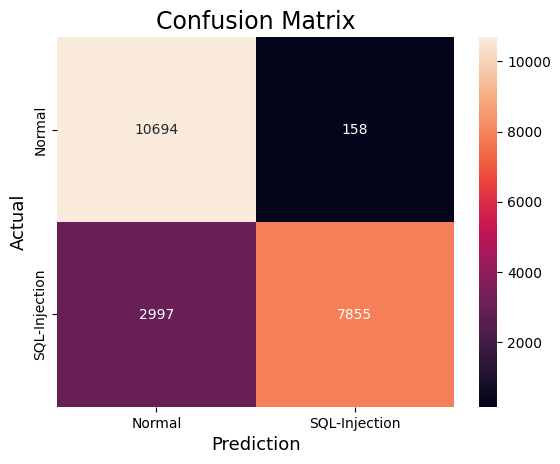

Model_name: AdaBoost:
accuracy: 0.9527276078142278
recall: 0.917250276446738
precision: 0.9873041063281095
f1 0.9509888220120378



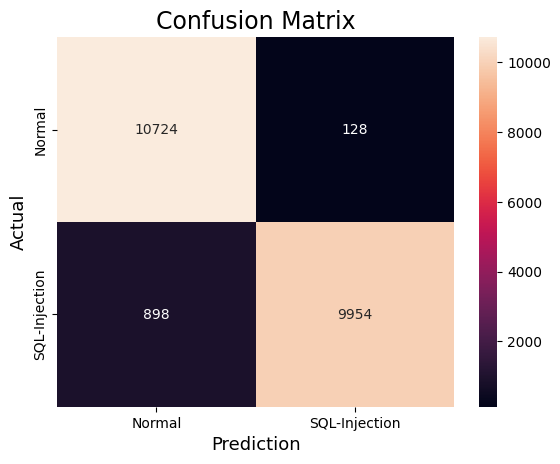

Model_name: Bagging:
accuracy: 0.963509030593439
recall: 0.9335606339845189
precision: 0.9930405802783768
f1 0.9623824451410659



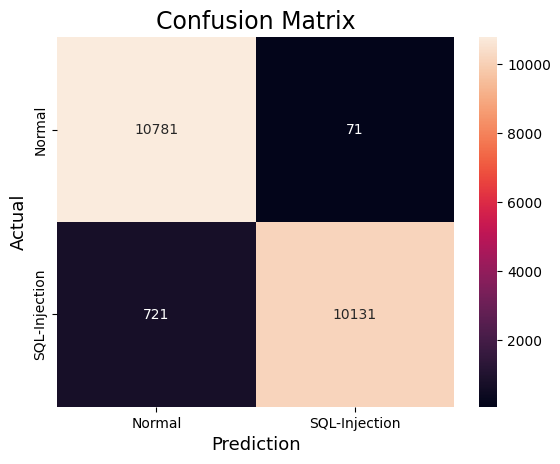

Model_name: ExtraTrees:
accuracy: 0.9868687799483966
recall: 0.9813859196461482
precision: 0.9922668405851114
f1 0.9867963863794301



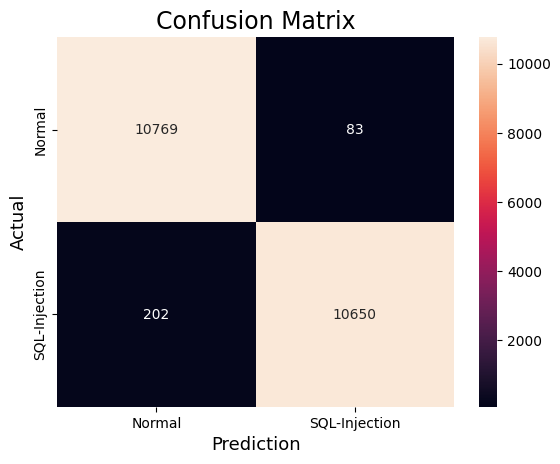

Model_name: LinearSVC:
accuracy: 0.9723553262071507
recall: 0.9514375230372282
precision: 0.9929794191190614
f1 0.971764705882353



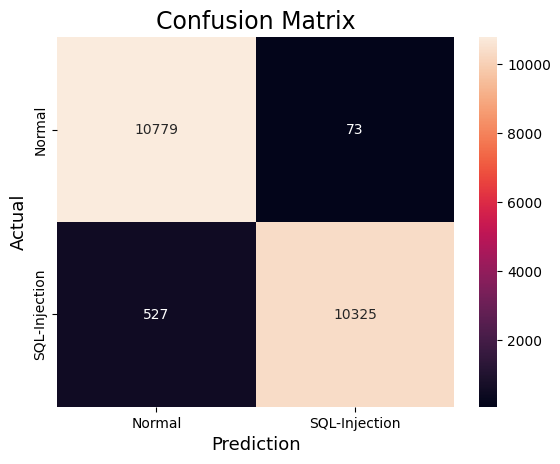

============================   Режим работы класса FeatureExtractor:	bag_of_words    ==========================
=========================   Вывод метрик для тестового датасета из файла train-dataset.tsv  ========================
Model_name: XGBoost:
accuracy: 0.9886311662855276
recall: 0.9878349788434415
precision: 0.981604765241766
f1 0.9847100175746925



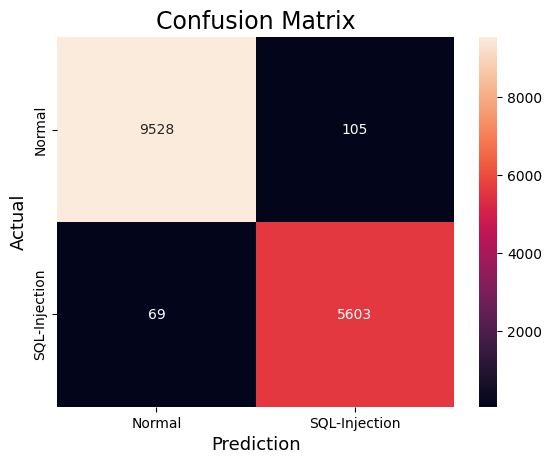

Model_name: SVC:
accuracy: 0.9453119895459
recall: 0.8580747531734838
precision: 0.9934680547050418
f1 0.9208211143695014



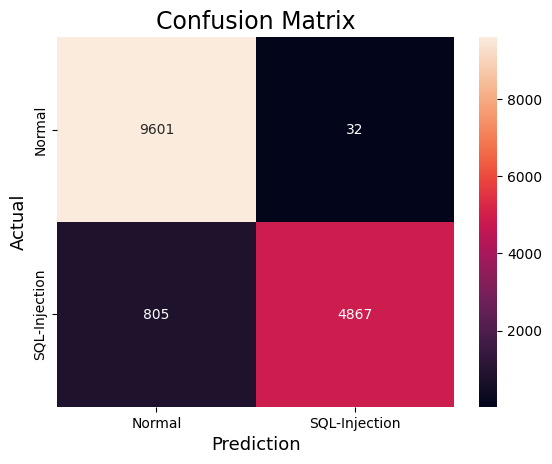

Model_name: NuSVC:
accuracy: 0.8557987585756289
recall: 0.6346967559943583
precision: 0.963855421686747
f1 0.765387477410439



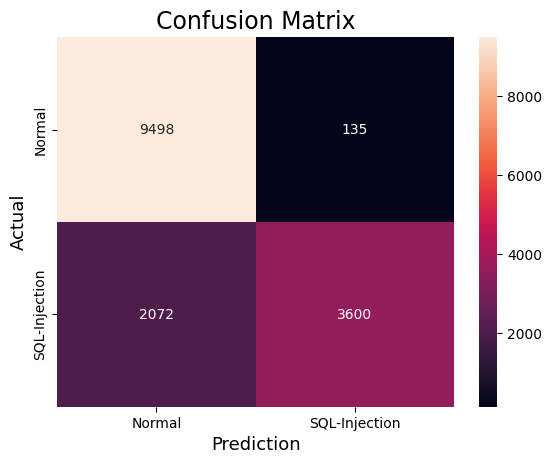

Model_name: KNeighbors:
accuracy: 0.9883698137863444
recall: 0.9777856135401974
precision: 0.9907109682029296
f1 0.9842058562555457



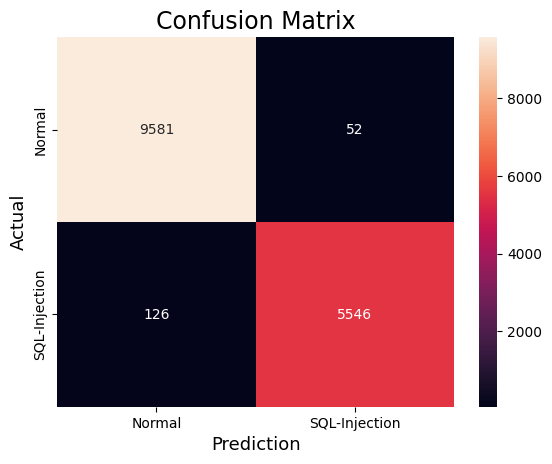

Model_name: DecisionTree:
accuracy: 0.9788957856909507
recall: 0.9696755994358252
precision: 0.973279065652097
f1 0.9714739909917867



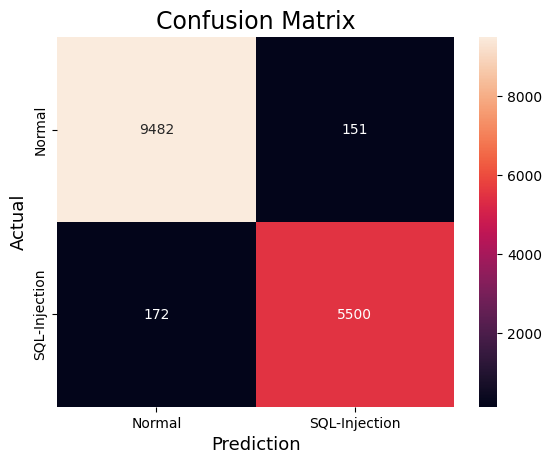

Model_name: RandomForest:
accuracy: 0.9670042469781117
recall: 0.9545133991537377
precision: 0.956368132838721
f1 0.9554398658784082



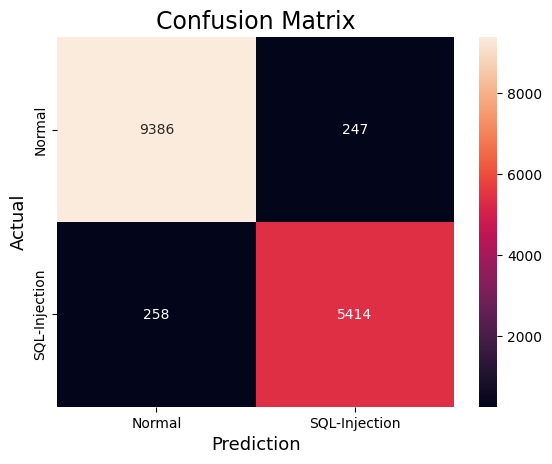

Model_name: AdaBoost:
accuracy: 0.9811172819340085
recall: 0.9742595204513399
precision: 0.9747750926089257
f1 0.9745172383387708



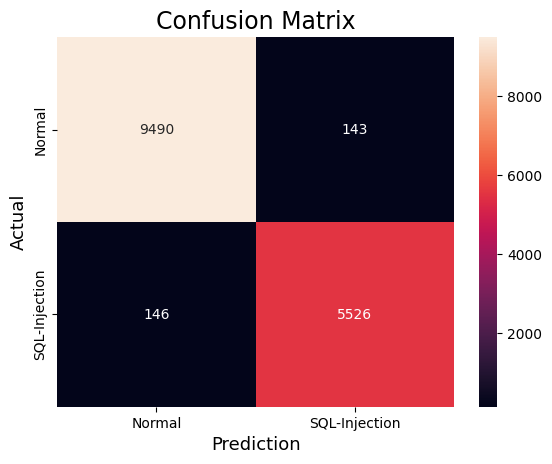

Model_name: Bagging:
accuracy: 0.9871283894152237
recall: 0.9800775740479548
precision: 0.9851143009037746
f1 0.9825894829871852



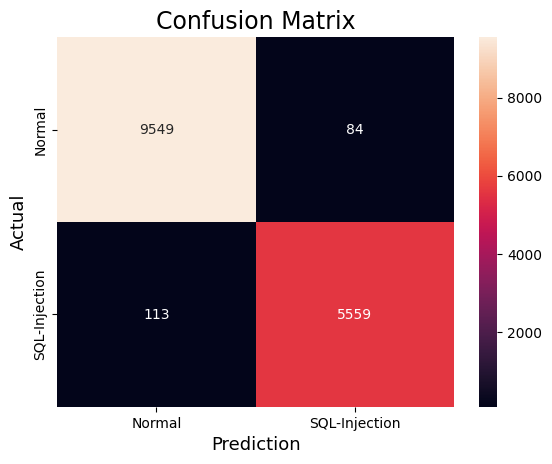

Model_name: ExtraTrees:
accuracy: 0.9905913100294022
recall: 0.986953455571227
precision: 0.9876499647141849
f1 0.9873015873015873



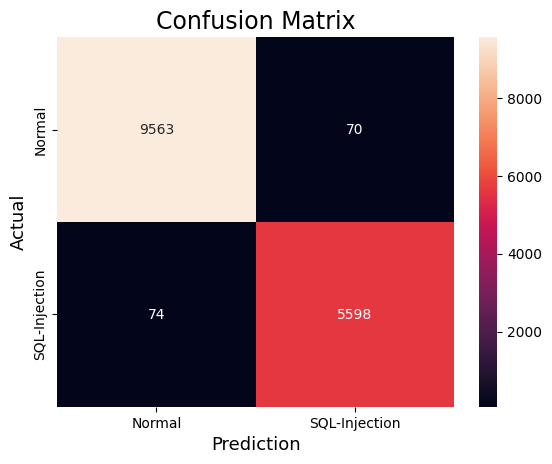

Model_name: LinearSVC:
accuracy: 0.9486442339104868
recall: 0.8915726375176305
precision: 0.967291507268554
f1 0.9278899082568808



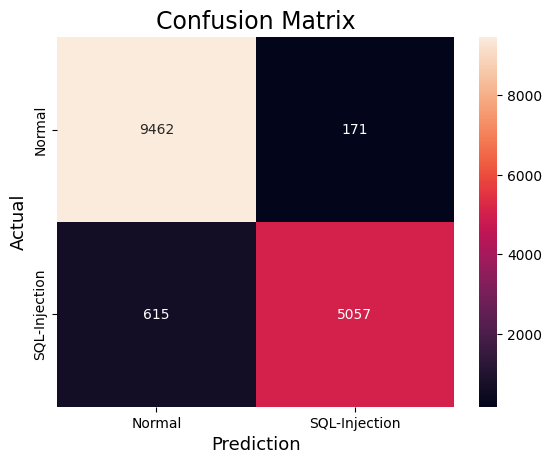

=========================   Вывод метрик для тестового датасета из файла  test-dataset.сsv  =======================
Model_name: XGBoost:
accuracy: 0.9959454478437154
recall: 0.9985256173977147
precision: 0.9933993399339934
f1 0.9959558823529412



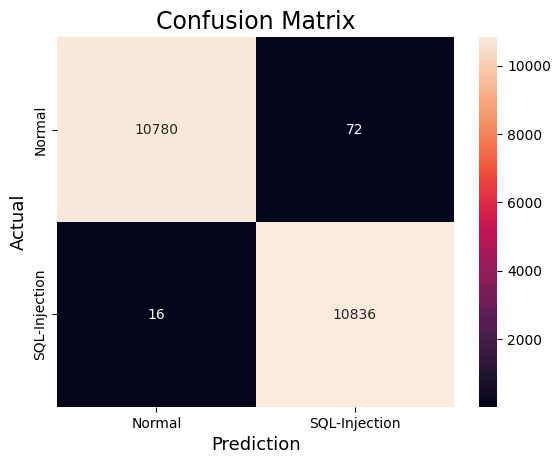

Model_name: SVC:
accuracy: 0.9294139329155916
recall: 0.8597493549576115
precision: 0.9989293361884368
f1 0.9241283676703645



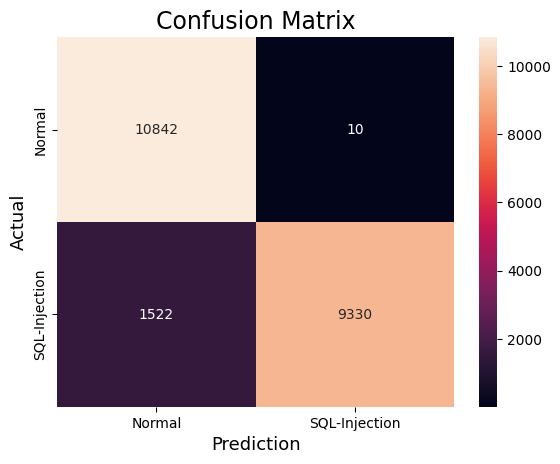

Model_name: NuSVC:
accuracy: 0.869563214154073
recall: 0.7421673424253594
precision: 0.9959193767775442
f1 0.850520090817889



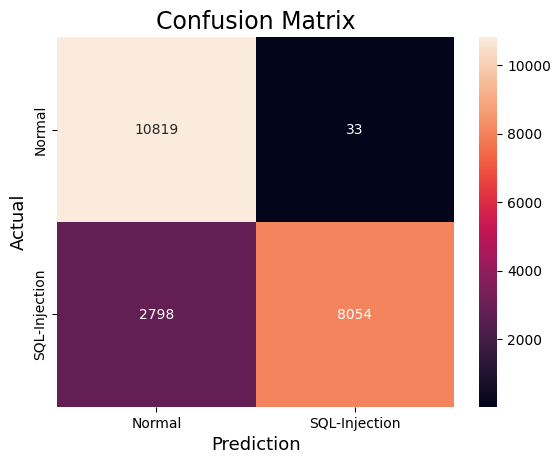

Model_name: KNeighbors:
accuracy: 0.9891725027644673
recall: 0.9834131957242904
precision: 0.9948727510021441
f1 0.9891097826590667



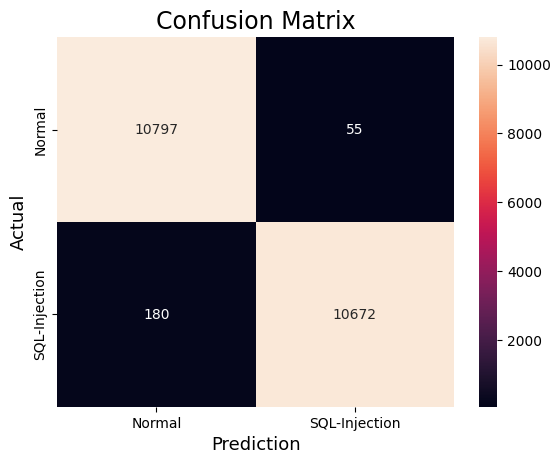

Model_name: DecisionTree:
accuracy: 0.9806948028013269
recall: 0.9718024327312937
precision: 0.9893986302655033
f1 0.9805215936032727



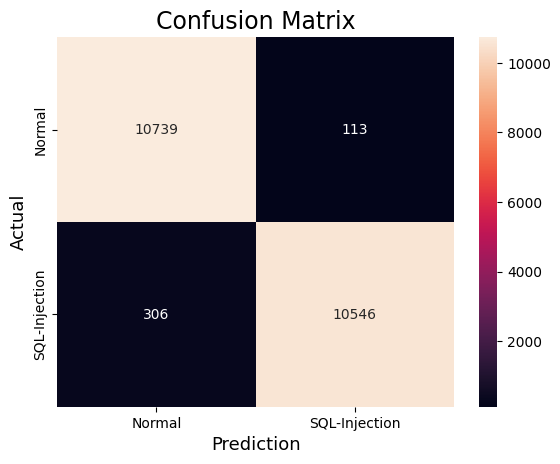

Model_name: RandomForest:
accuracy: 0.9711573903427939
recall: 0.9547548838923701
precision: 0.9871379573170732
f1 0.9706764099681469



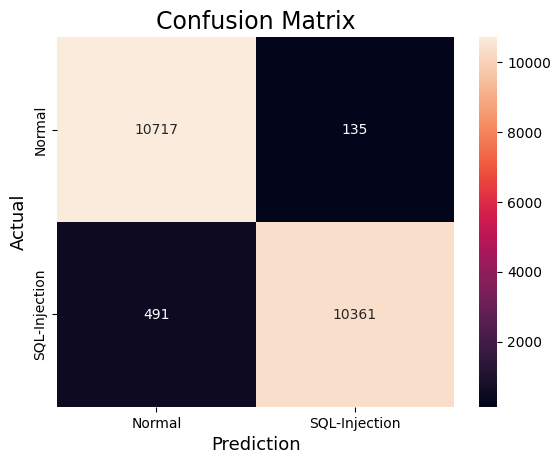

Model_name: AdaBoost:
accuracy: 0.9885274603759676
recall: 0.9871913011426465
precision: 0.9898364593920355
f1 0.9885121107266436



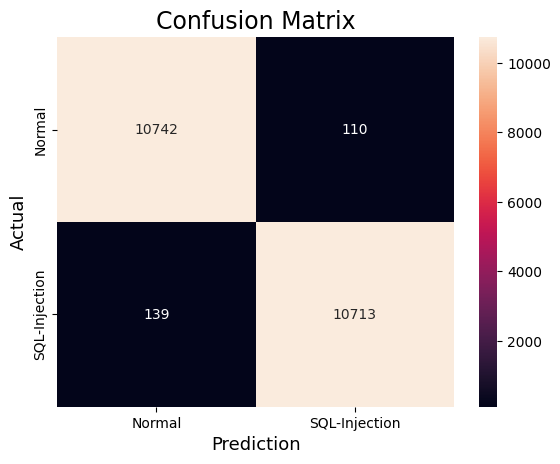

Model_name: Bagging:
accuracy: 0.989126428308146
recall: 0.9834131957242904
precision: 0.9947800149142431
f1 0.9890639481000927



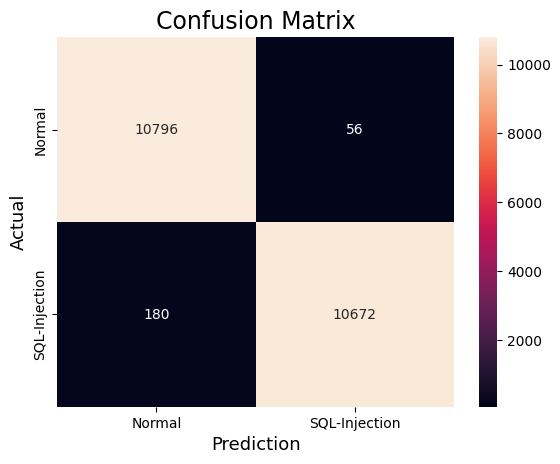

Model_name: ExtraTrees:
accuracy: 0.995346479911537
recall: 0.9964983413195724
precision: 0.9942079617541602
f1 0.9953518339546229



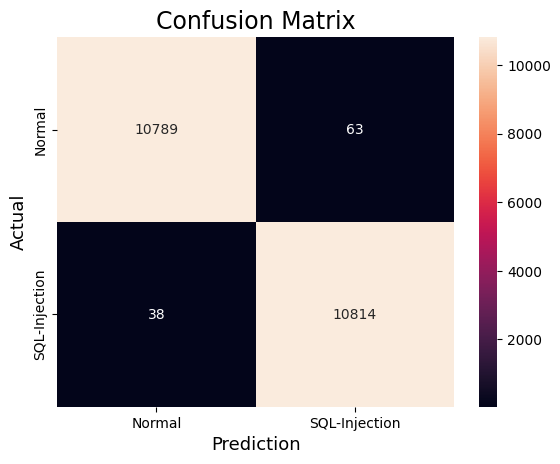

Model_name: LinearSVC:
accuracy: 0.9771931441208994
recall: 0.9583486914854404
precision: 0.995882409269367
f1 0.9767551068325898



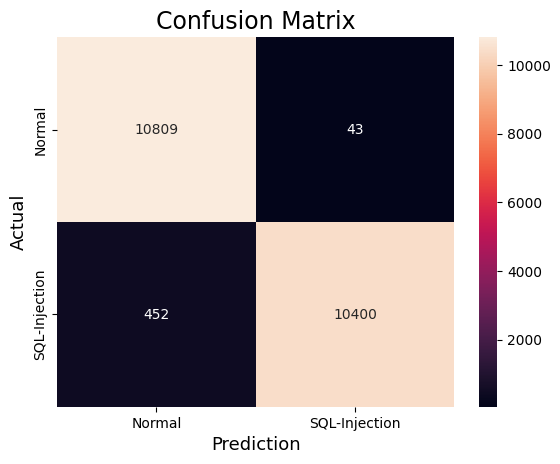

Дамп модели bag_of_words_XGBoost сохранен в bag_of_words_XGBoost_save_hw2.pkl
Дамп модели bag_of_words_SVC сохранен в bag_of_words_SVC_save_hw2.pkl
Дамп модели bag_of_words_NuSVC сохранен в bag_of_words_NuSVC_save_hw2.pkl
Дамп модели bag_of_words_KNeighbors сохранен в bag_of_words_KNeighbors_save_hw2.pkl
Дамп модели bag_of_words_DecisionTree сохранен в bag_of_words_DecisionTree_save_hw2.pkl
Дамп модели bag_of_words_RandomForest сохранен в bag_of_words_RandomForest_save_hw2.pkl
Дамп модели bag_of_words_AdaBoost сохранен в bag_of_words_AdaBoost_save_hw2.pkl
Дамп модели bag_of_words_Bagging сохранен в bag_of_words_Bagging_save_hw2.pkl
Дамп модели bag_of_words_ExtraTrees сохранен в bag_of_words_ExtraTrees_save_hw2.pkl
Дамп модели bag_of_words_LinearSVC сохранен в bag_of_words_LinearSVC_save_hw2.pkl
Модель bag_of_words_XGBoost загружена из дампа bag_of_words_XGBoost_save_hw2.pkl
Модель bag_of_words_SVC загружена из дампа bag_of_words_SVC_save_hw2.pkl
Модель bag_of_words_NuSVC загружена из д

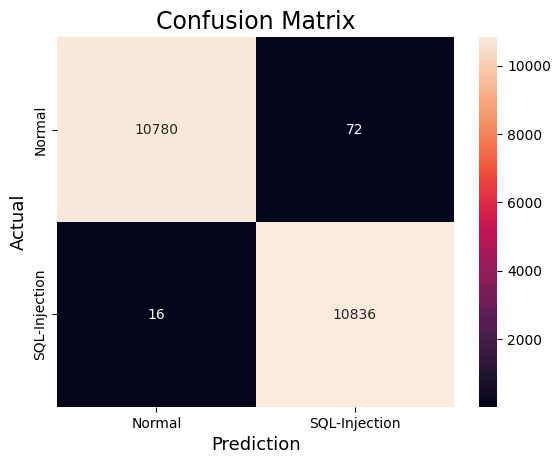

Model_name: SVC:
accuracy: 0.9294139329155916
recall: 0.8597493549576115
precision: 0.9989293361884368
f1 0.9241283676703645



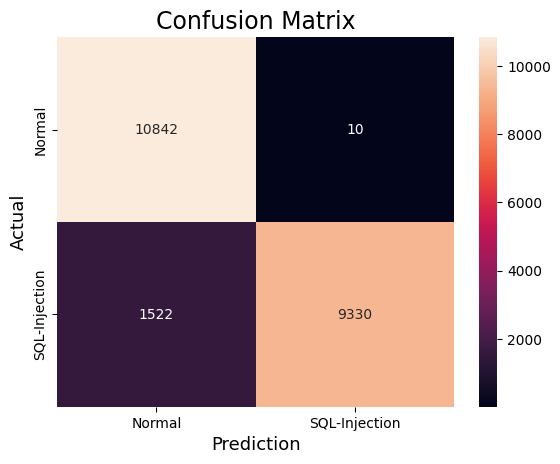

Model_name: NuSVC:
accuracy: 0.869563214154073
recall: 0.7421673424253594
precision: 0.9959193767775442
f1 0.850520090817889



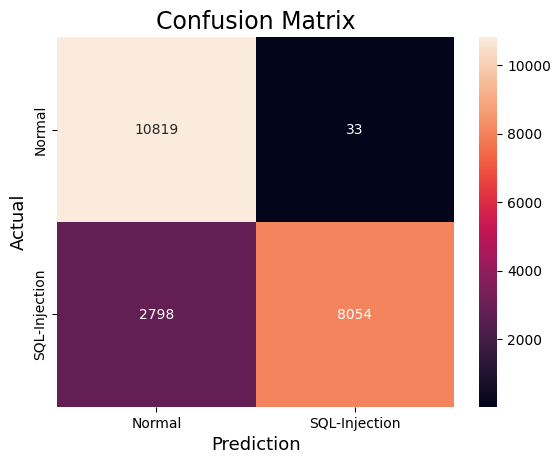

Model_name: KNeighbors:
accuracy: 0.9891725027644673
recall: 0.9834131957242904
precision: 0.9948727510021441
f1 0.9891097826590667



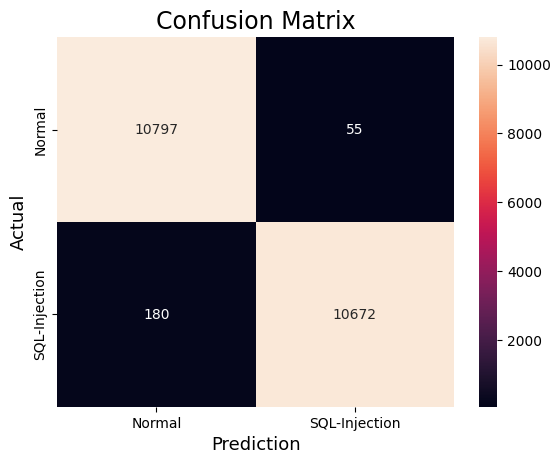

Model_name: DecisionTree:
accuracy: 0.9806948028013269
recall: 0.9718024327312937
precision: 0.9893986302655033
f1 0.9805215936032727



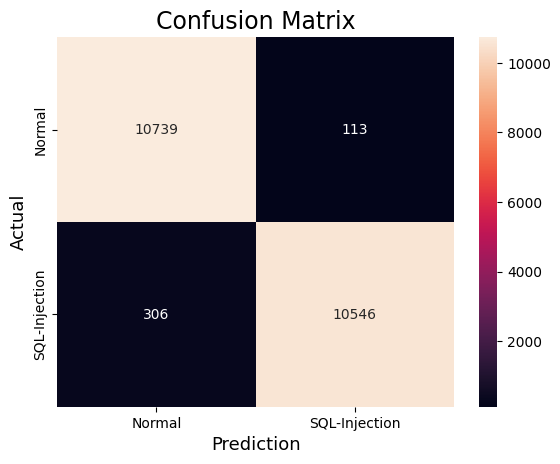

Model_name: RandomForest:
accuracy: 0.9711573903427939
recall: 0.9547548838923701
precision: 0.9871379573170732
f1 0.9706764099681469



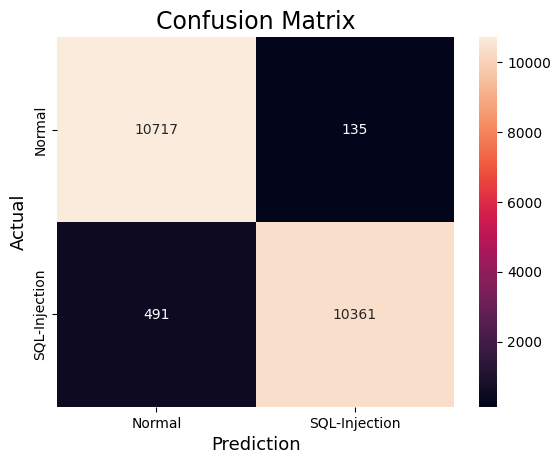

Model_name: AdaBoost:
accuracy: 0.9885274603759676
recall: 0.9871913011426465
precision: 0.9898364593920355
f1 0.9885121107266436



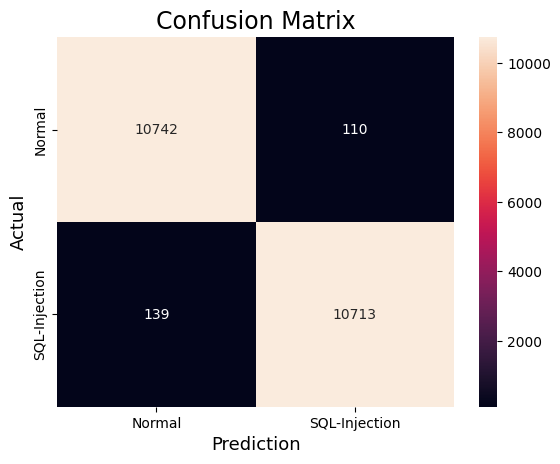

Model_name: Bagging:
accuracy: 0.989126428308146
recall: 0.9834131957242904
precision: 0.9947800149142431
f1 0.9890639481000927



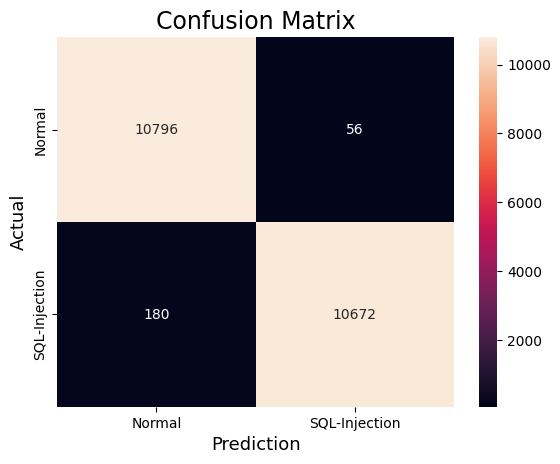

Model_name: ExtraTrees:
accuracy: 0.995346479911537
recall: 0.9964983413195724
precision: 0.9942079617541602
f1 0.9953518339546229



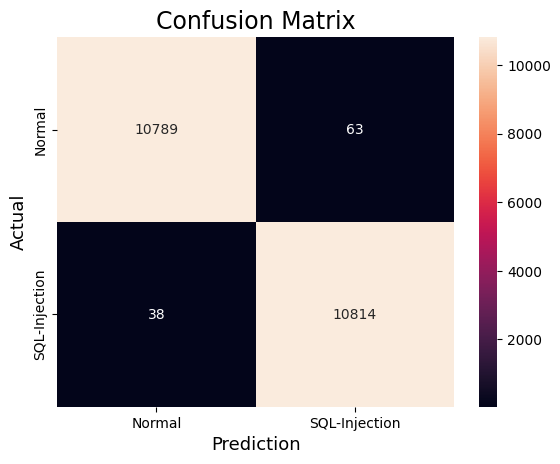

Model_name: LinearSVC:
accuracy: 0.9771931441208994
recall: 0.9583486914854404
precision: 0.995882409269367
f1 0.9767551068325898



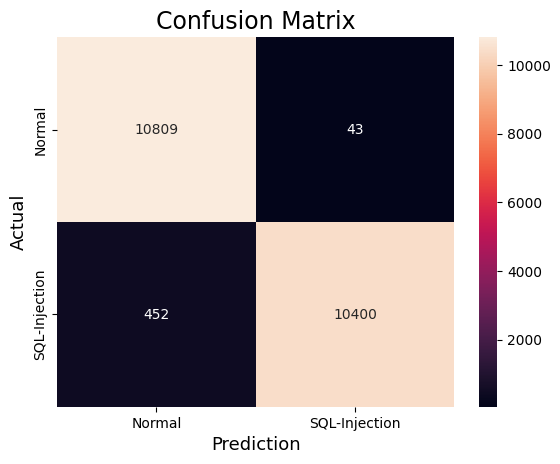

============================   Режим работы класса FeatureExtractor:	bag_of_characters    ==========================
=========================   Вывод метрик для тестового датасета из файла train-dataset.tsv  ========================
Model_name: XGBoost:
accuracy: 0.994250245017968
recall: 0.9871342967923863
precision: 0.9973290598290598
f1 0.9922054915854739



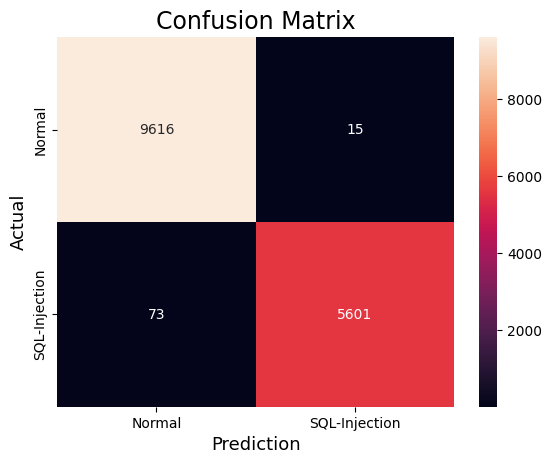

Model_name: SVC:
accuracy: 0.8838288141130349
recall: 0.9933027846316531
precision: 0.7640997830802603
f1 0.8637547892720306



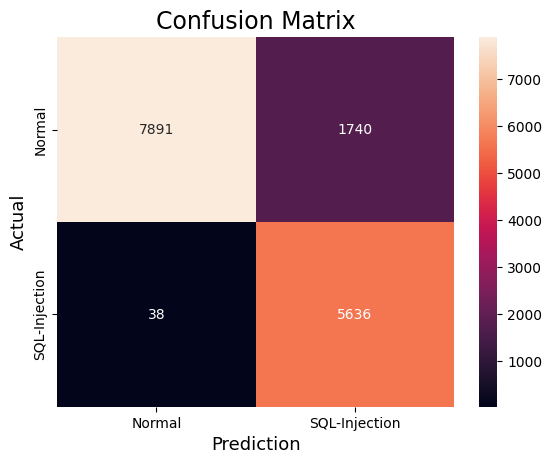

Model_name: NuSVC:
accuracy: 0.9016661221822934
recall: 0.8313359182234755
precision: 0.8959164292497626
f1 0.8624188682694944



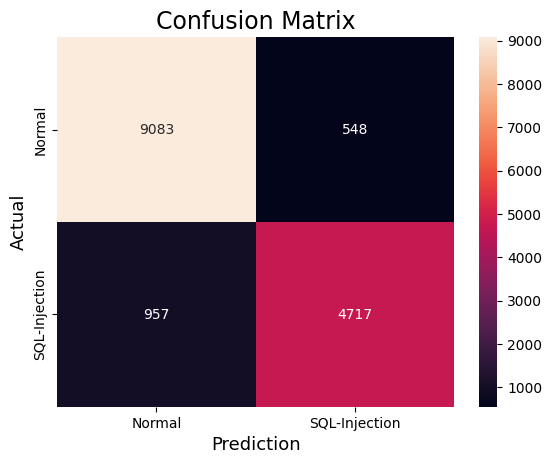

Model_name: KNeighbors:
accuracy: 0.9924207775236851
recall: 0.9827282340500528
precision: 0.9967822667143368
f1 0.9897053603123891



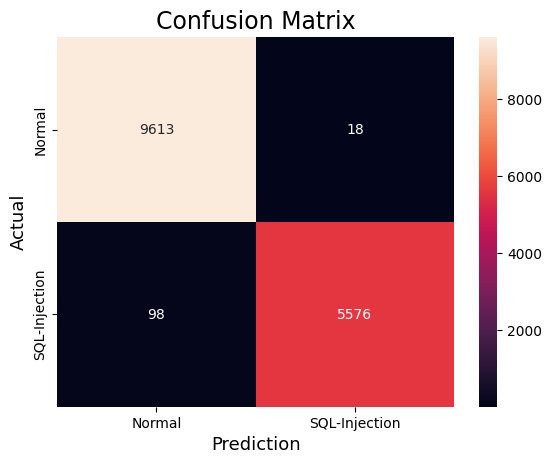

Model_name: DecisionTree:
accuracy: 0.9492322770336491
recall: 0.8856186112090236
precision: 0.97516010091209
f1 0.9282349681352176



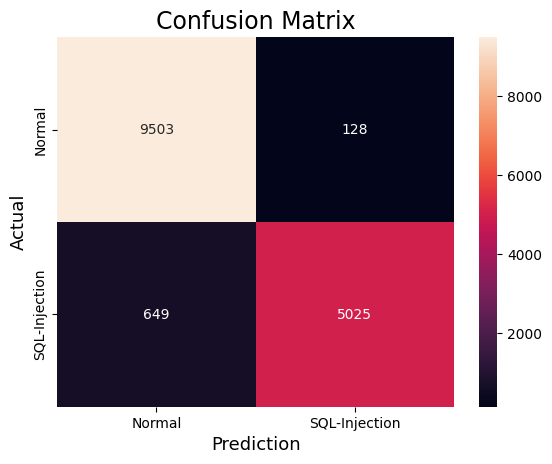

Model_name: RandomForest:
accuracy: 0.9131002940215616
recall: 0.8145928798026084
precision: 0.943265306122449
f1 0.8742197843767732



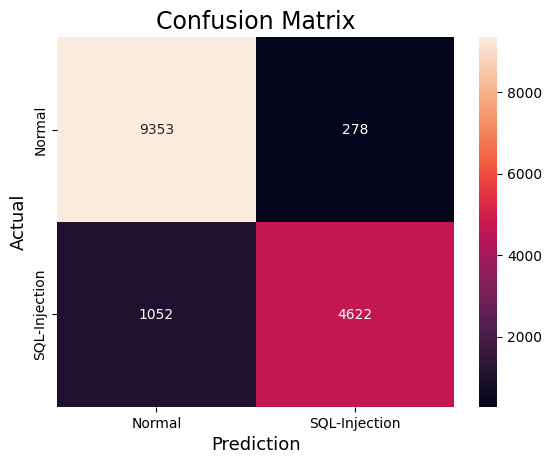

Model_name: AdaBoost:
accuracy: 0.9696831100947403
recall: 0.9481847021501586
precision: 0.9693693693693693
f1 0.9586600142551674



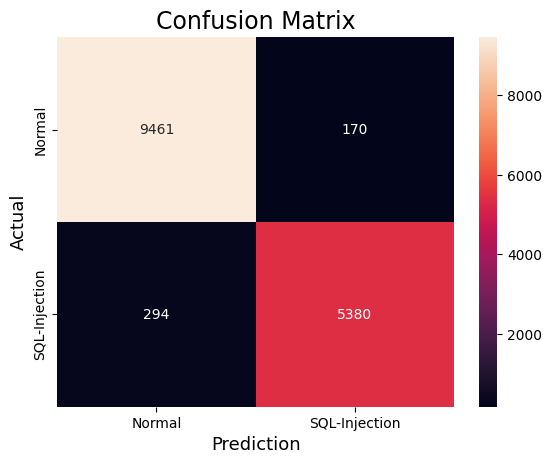

Model_name: Bagging:
accuracy: 0.9867363606664489
recall: 0.9746210786041594
precision: 0.9894435498300233
f1 0.9819763828464885



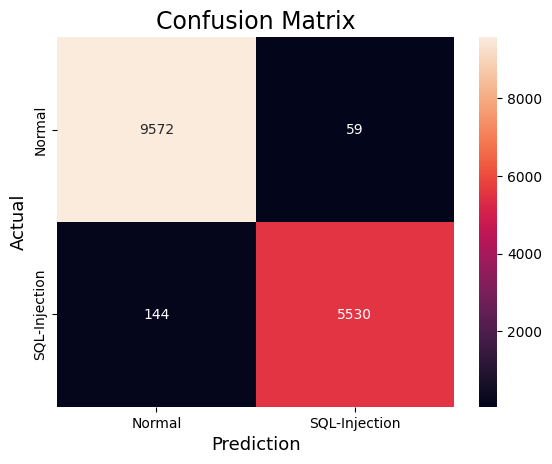

Model_name: ExtraTrees:
accuracy: 0.9930741587716433
recall: 0.9832569615791329
precision: 0.9980322003577817
f1 0.9905894886363636



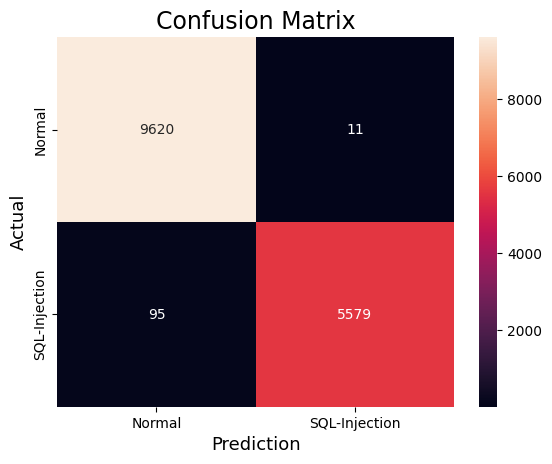

Model_name: LinearSVC:
accuracy: 0.9658934988565828
recall: 0.9332040888262249
precision: 0.9737035674880471
f1 0.953023758099352



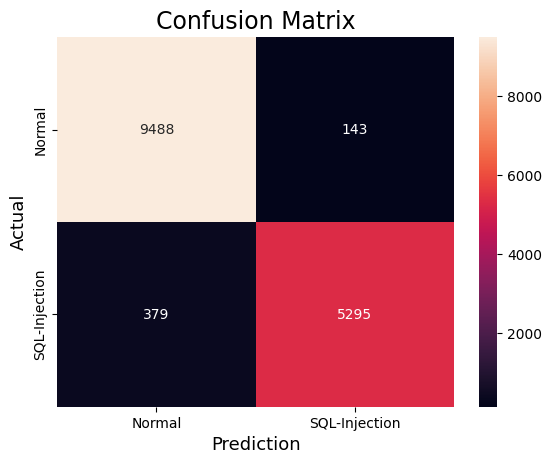

=========================   Вывод метрик для тестового датасета из файла  test-dataset.сsv  =======================
Model_name: XGBoost:
accuracy: 0.9481662366384077
recall: 0.8991890895687431
precision: 0.9968331801001123
f1 0.9454968267041326



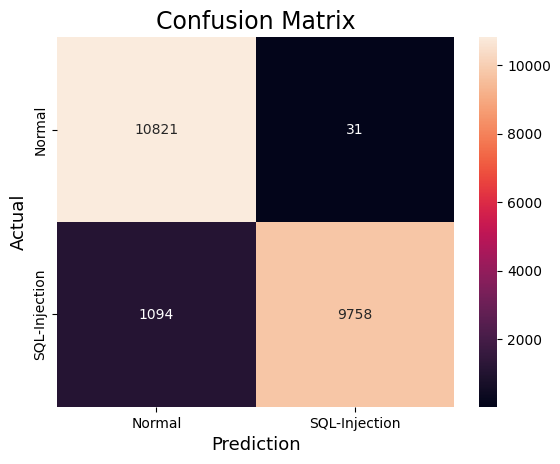

Model_name: SVC:
accuracy: 0.9362329524511611
recall: 0.9993549576115002
precision: 0.8873343151693667
f1 0.9400190690820838



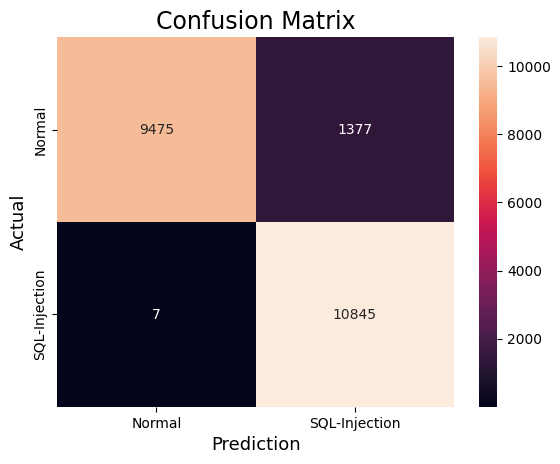

Model_name: NuSVC:
accuracy: 0.9531883523774419
recall: 0.9353114633247328
precision: 0.9699923547400612
f1 0.9523362732219929



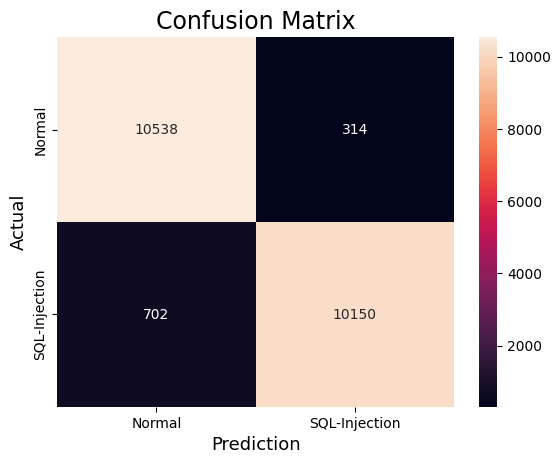

Model_name: KNeighbors:
accuracy: 0.9170199041651309
recall: 0.8435311463324733
precision: 0.9888732850815599
f1 0.9104381122880303



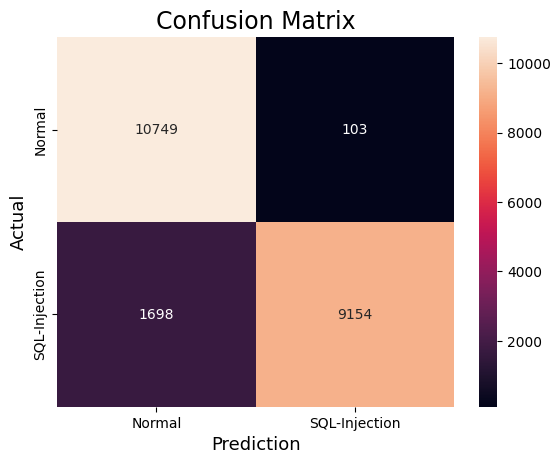

Model_name: DecisionTree:
accuracy: 0.9131035753778105
recall: 0.8423332104681165
precision: 0.9812151137827394
f1 0.9064855216184053



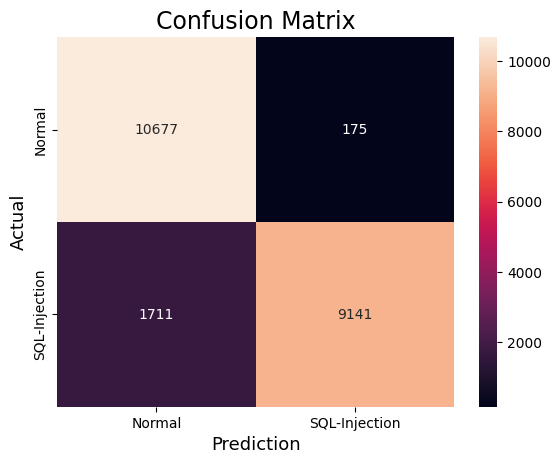

Model_name: RandomForest:
accuracy: 0.9104773313674899
recall: 0.8576299299668264
precision: 0.9589902112313241
f1 0.9054823174587732



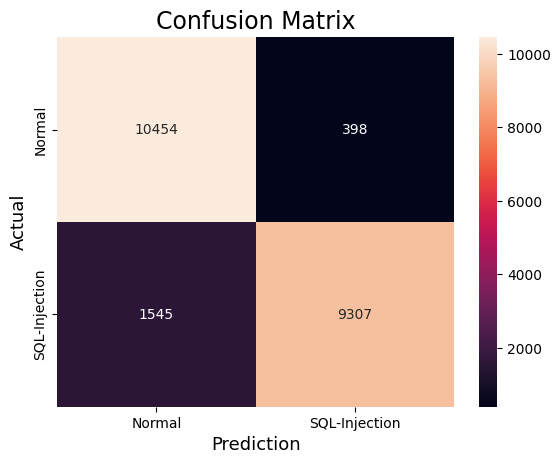

Model_name: AdaBoost:
accuracy: 0.912596756358275
recall: 0.8778105418356064
precision: 0.9434485490739823
f1 0.909446751634923



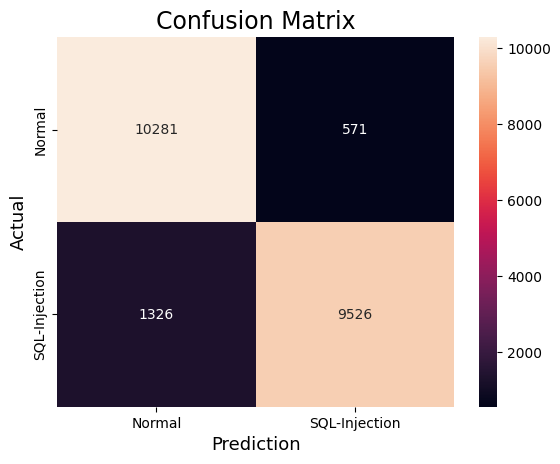

Model_name: Bagging:
accuracy: 0.9213048286030224
recall: 0.848046443051972
precision: 0.9936298855538761
f1 0.9150840210798449



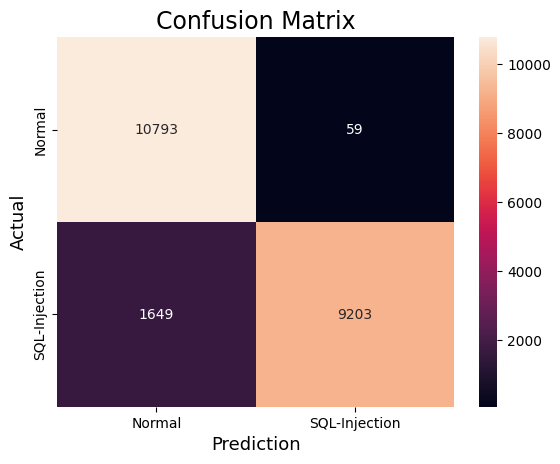

Model_name: ExtraTrees:
accuracy: 0.9256358274972355
recall: 0.8804828603022484
precision: 0.9678889789303079
f1 0.9221192819918934



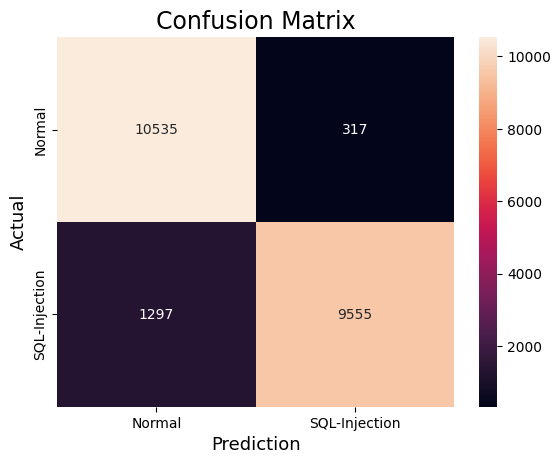

Model_name: LinearSVC:
accuracy: 0.8848138591964615
recall: 0.7904533726502028
precision: 0.9743298500681509
f1 0.8728123728123728



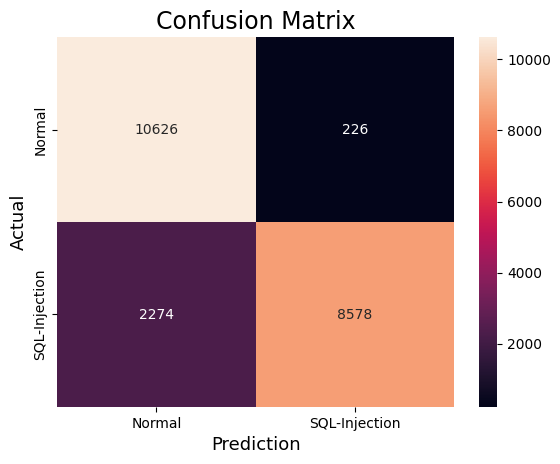

Дамп модели bag_of_characters_XGBoost сохранен в bag_of_characters_XGBoost_save_hw2.pkl
Дамп модели bag_of_characters_SVC сохранен в bag_of_characters_SVC_save_hw2.pkl
Дамп модели bag_of_characters_NuSVC сохранен в bag_of_characters_NuSVC_save_hw2.pkl
Дамп модели bag_of_characters_KNeighbors сохранен в bag_of_characters_KNeighbors_save_hw2.pkl
Дамп модели bag_of_characters_DecisionTree сохранен в bag_of_characters_DecisionTree_save_hw2.pkl
Дамп модели bag_of_characters_RandomForest сохранен в bag_of_characters_RandomForest_save_hw2.pkl
Дамп модели bag_of_characters_AdaBoost сохранен в bag_of_characters_AdaBoost_save_hw2.pkl
Дамп модели bag_of_characters_Bagging сохранен в bag_of_characters_Bagging_save_hw2.pkl
Дамп модели bag_of_characters_ExtraTrees сохранен в bag_of_characters_ExtraTrees_save_hw2.pkl
Дамп модели bag_of_characters_LinearSVC сохранен в bag_of_characters_LinearSVC_save_hw2.pkl
Модель bag_of_characters_XGBoost загружена из дампа bag_of_characters_XGBoost_save_hw2.pkl
Мод

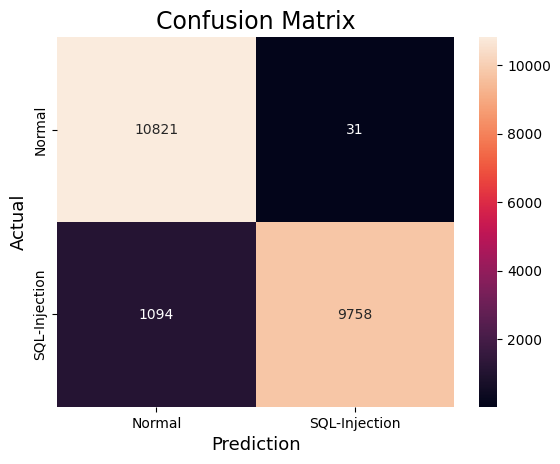

Model_name: SVC:
accuracy: 0.9362329524511611
recall: 0.9993549576115002
precision: 0.8873343151693667
f1 0.9400190690820838



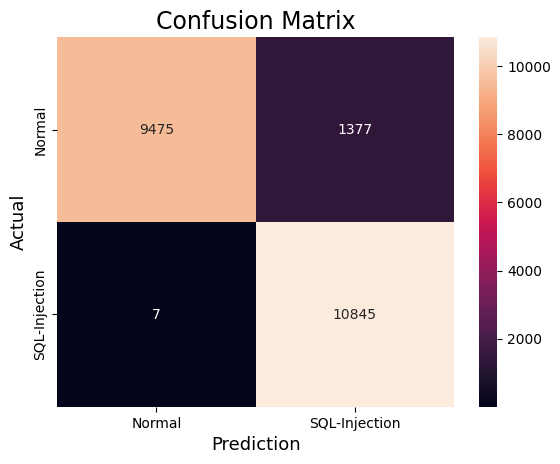

Model_name: NuSVC:
accuracy: 0.9531883523774419
recall: 0.9353114633247328
precision: 0.9699923547400612
f1 0.9523362732219929



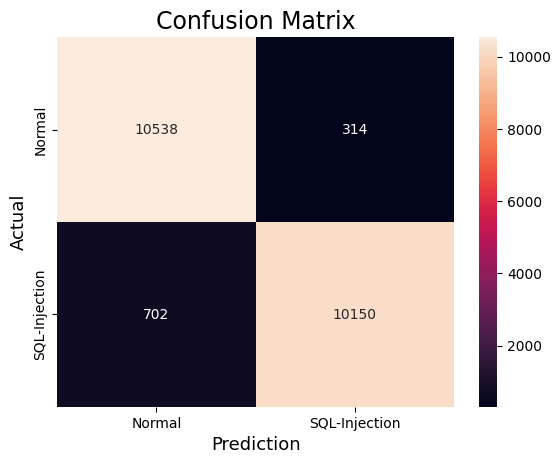

Model_name: KNeighbors:
accuracy: 0.9170199041651309
recall: 0.8435311463324733
precision: 0.9888732850815599
f1 0.9104381122880303



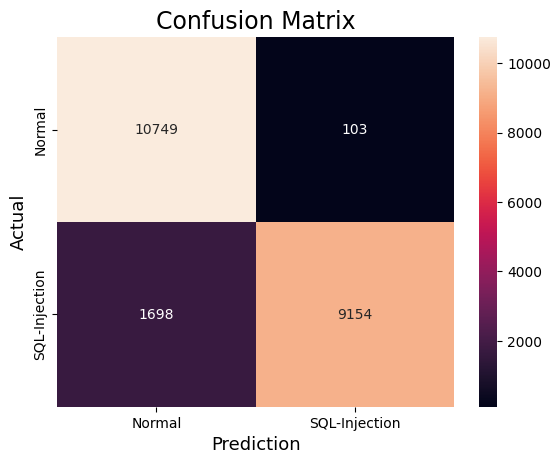

Model_name: DecisionTree:
accuracy: 0.9131035753778105
recall: 0.8423332104681165
precision: 0.9812151137827394
f1 0.9064855216184053



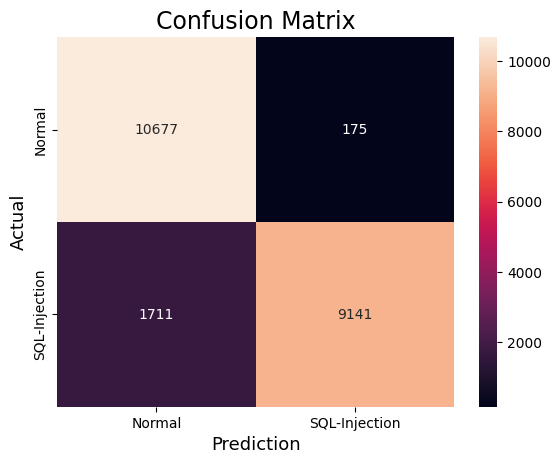

Model_name: RandomForest:
accuracy: 0.9104773313674899
recall: 0.8576299299668264
precision: 0.9589902112313241
f1 0.9054823174587732



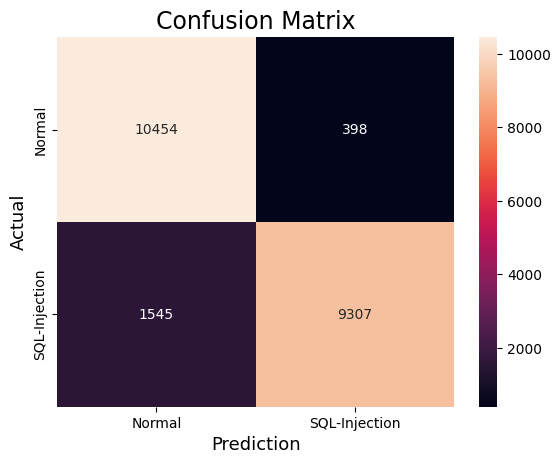

Model_name: AdaBoost:
accuracy: 0.912596756358275
recall: 0.8778105418356064
precision: 0.9434485490739823
f1 0.909446751634923



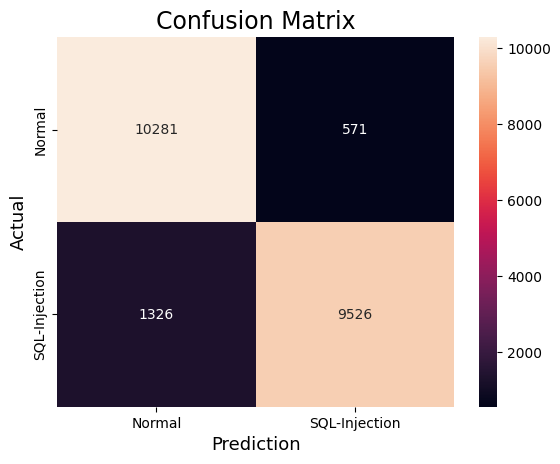

Model_name: Bagging:
accuracy: 0.9213048286030224
recall: 0.848046443051972
precision: 0.9936298855538761
f1 0.9150840210798449



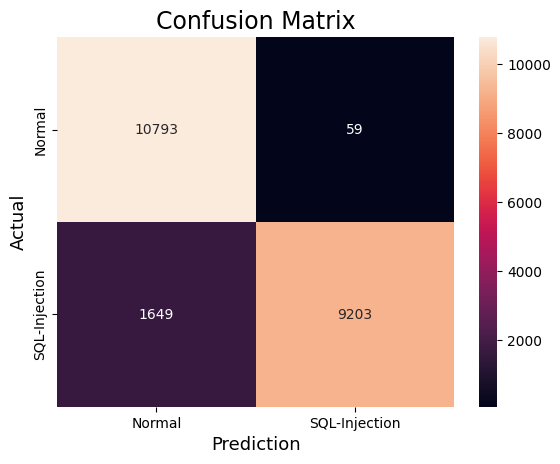

Model_name: ExtraTrees:
accuracy: 0.9256358274972355
recall: 0.8804828603022484
precision: 0.9678889789303079
f1 0.9221192819918934



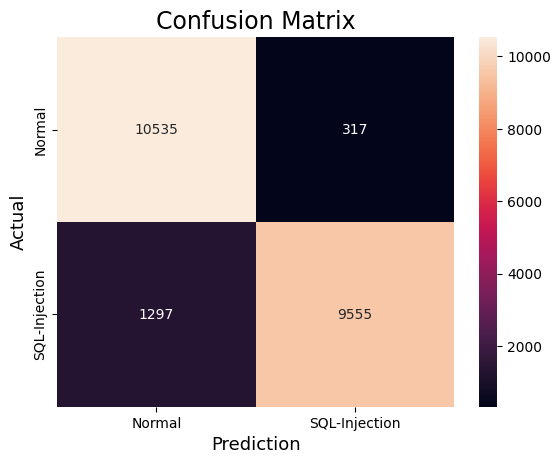

Model_name: LinearSVC:
accuracy: 0.8848138591964615
recall: 0.7904533726502028
precision: 0.9743298500681509
f1 0.8728123728123728



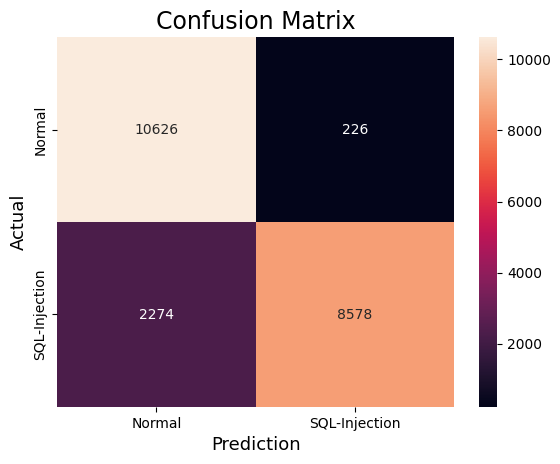

In [13]:
# Запуск домашней работы №2


# список экстракт режимов
extract_methods = ['tf-idf', 'tf-idf_ngram', 'bag_of_words', 'bag_of_characters']
# словарь моделей
models_dict = {'XGBoost': None,
               'SVC': None,
               'NuSVC': None,
               'KNeighbors': None,
               'DecisionTree': None,
               'RandomForest': None,
               'AdaBoost': None,
               'Bagging': None,
               'ExtraTrees': None,
               'LinearSVC': None}

# словарь для сохранения результатов тестирования моделей на тестовых данных из набора datasets/train-dataset.tsv,
# а также на тестовых данных из набора datasets/test-dataset.csv
results_dict = {}

# словарь для сохранения результатов тестирования моделей на тестовых данных из набора datasets/test-dataset.csv
# после загрузки обученных моделей из дамп файлов .pkl. Я использую этот дополнительный словарь, чтобы убедиться в том,
# обученные модели были успешно получены из дамп файлов .pkl
results_dict_for_load_models = {}

for extract_method in extract_methods:
    print(f'====================================================================================================================')
    print(f'============================   Режим работы класса FeatureExtractor:\t{extract_method}    ==========================')
    print(f'====================================================================================================================')
    # 1 Загрузка исходного датасета
    x_train, y_train, x_test, y_test = get_source_data('datasets/train-dataset.tsv')
    # 2 Токенизация и векторизация данных, получение ключевых токенов
    extractor, selecter, x_train_selected, x_test_selected = extract_and_select_data(extract_method, x_train, y_train, x_test, y_test)
    # 3 Обучение моделей на тренировочных данных из набора train-dataset.tsv
    for model_name in models_dict.keys():
        models_dict[model_name] = train_model(model_name, x_train_selected, y_train)
    
    # 4 тестирование обученных моделей на тестовых данных из набора train-dataset.tsv
    print(f'=========================   Вывод метрик для тестового датасета из файла train-dataset.tsv  ========================')
    for model_name in models_dict.keys():
        # Рассчет метрик
        accuracy, recall, precision, f1, plt = run_model(model=models_dict[model_name], x_test_selected=x_test_selected, y_test=y_test)
        print(f'Model_name: {model_name}:\naccuracy: {accuracy}\nrecall: {recall}\nprecision: {precision}\nf1 {f1}\n')
        # Построение матрицы ошибок
        plt.show()
    
    # 5. Тестирование обученных моделей на тестовых данных из набора test-dataset.tsv
    print(f'=========================   Вывод метрик для тестового датасета из файла  test-dataset.сsv  =======================')
    results_dict.update({extract_method:{}})
    # Получение нового датасета из файла test-dataset.csv, токенизация, векторизация и отбор ключевых токенов
    # с помощью обученных extractor и selecter
    X_test_selected, Y_test = get_test_data('datasets/test-dataset.csv', extractor, selecter)
    for model_name in models_dict.keys():
        results_dict[extract_method].update({model_name: {}})
        # Рассчет метрик
        accuracy, recall, precision, f1, plt = run_model(model=models_dict[model_name], x_test_selected=X_test_selected, y_test=Y_test)
        results_dict[extract_method][model_name].update({'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1})
        print(f'Model_name: {model_name}:\naccuracy: {accuracy}\nrecall: {recall}\nprecision: {precision}\nf1 {f1}\n')
        # Построение матрицы ошибок
        plt.show()
        
    # 6 Сохранение обученных моделей в файлы .pkl
    for model_name, model_value in models_dict.items():
        # создание дампа обученных моделей
        # модель будет сохранена в файл в виде extract_method_model_name_save_hw2.pkl (например tf-idf_XGBoost_save_hw2.pkl)
        dump_model(model_value, extract_method + '_' + model_name)
        
    # 7 Восстановление обученных моделей из файлов .pkl
    for model_name, model_value in models_dict.items():
        # получение обученных моделей из дампа
        model_value = load_model(extract_method + '_' + model_name)
        
    print(f'\n\n=== Вывод метрик для тестового датасета из файла test-dataset.сsv для моделей, загруженных из дамп файлов .pkl ===')
    results_dict_for_load_models.update({extract_method:{}})
    # 8 Проверка работы моделей, восстановленных из файлов .pkl.
    # Проводится для того, чтобы убедиться в том, что модели успешно загружаются из дампа
    for model_name in models_dict.keys():
        results_dict_for_load_models[extract_method].update({model_name: {}})
        accuracy, recall, precision, f1, plt = run_model(model=models_dict[model_name], x_test_selected=X_test_selected, y_test=Y_test)
        results_dict_for_load_models[extract_method][model_name].update({'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1})
        print(f'Model_name: {model_name}:\naccuracy: {accuracy}\nrecall: {recall}\nprecision: {precision}\nf1 {f1}\n')
        plt.show()
        
    del(x_train, y_train, x_test, y_test, X_test_selected, Y_test)
    del(extractor, selecter, x_train_selected, x_test_selected)


In [14]:
# вывод результатов работы
print("======================================================================================================================")
print("======= Вывод метрик для моделей, протестированных на данных из datasets/train-dataset.tsv и datasets/test-dataset.csv")
print("======================================================================================================================")
for extract_method in results_dict.keys():
    print(f'====================================================================================================================')
    print(f'============================   Режим работы класса FeatureExtractor:\t{extract_method}    ==========================')
    print(f'====================================================================================================================')
    for model_name, metrics in results_dict[extract_method].items():
        if model_name == 'SVC' or model_name == 'NuSVC':
            print(model_name, ':\t\t' , end=' ')
        else:
            print(model_name, ':\t' , end=' ')
        for metric_name, metric_value in metrics.items():
            print(metric_name, metric_value, end=' ')
        print()
    
    best_accuracy = {}
    best_recall = {}
    best_precision = {}
    best_f1 = {}
    
    for model_name, metrics in results_dict[extract_method].items():
        best_accuracy.update({model_name: metrics['accuracy']})
    for model_name, metrics in results_dict[extract_method].items():
        best_recall.update({model_name: metrics['recall']})
    for model_name, metrics in results_dict[extract_method].items():
        best_precision.update({model_name: metrics['precision']})
    for model_name, metrics in results_dict[extract_method].items():
        best_f1.update({model_name: metrics['f1']})
        
    best_accuracy = sorted(best_accuracy.items(), key = lambda kv: kv[1], reverse=True)
    best_recall = sorted(best_recall.items(), key = lambda kv: kv[1], reverse=True)
    best_precision = sorted(best_precision.items(), key = lambda kv: kv[1], reverse=True)
    best_f1 = sorted(best_f1.items(), key = lambda kv: kv[1], reverse=True)

    print('best_accuracy:\t', best_accuracy[0][0], best_accuracy[0][1])
    print('best_recall:\t',best_recall[0][0], best_recall[0][1])
    print('best_precision:\t',best_precision[0][0], best_precision[0][1])
    print('best_f1:\t', best_f1[0][0], best_f1[0][1])
    del(best_accuracy, best_recall, best_precision, best_f1)

print("======================================================================================================================")
print("== Вывод метрик для моделей, загруженных из дамп файлов .pkl и протестированных на данных из datasets/test-dataset.csv")
print("======================================================================================================================")
for extract_method in results_dict_for_load_models.keys():
    print(f'====================================================================================================================')
    print(f'============================   Режим работы класса FeatureExtractor:\t{extract_method}    ==========================')
    print(f'====================================================================================================================')
    for model_name, metrics in results_dict_for_load_models[extract_method].items():
        if model_name == 'SVC' or model_name == 'NuSVC':
            print(model_name, ':\t\t' , end=' ')
        else:
            print(model_name, ':\t' , end=' ')
        for metric_name, metric_value in metrics.items():
            print(metric_name, metric_value, end=' ')
        print()
    
    best_accuracy = {}
    best_recall = {}
    best_precision = {}
    best_f1 = {}
    
    for model_name, metrics in results_dict_for_load_models[extract_method].items():
        best_accuracy.update({model_name: metrics['accuracy']})
    for model_name, metrics in results_dict_for_load_models[extract_method].items():
        best_recall.update({model_name: metrics['recall']})
    for model_name, metrics in results_dict_for_load_models[extract_method].items():
        best_precision.update({model_name: metrics['precision']})
    for model_name, metrics in results_dict_for_load_models[extract_method].items():
        best_f1.update({model_name: metrics['f1']})
        
    best_accuracy = sorted(best_accuracy.items(), key = lambda kv: kv[1], reverse=True)
    best_recall = sorted(best_recall.items(), key = lambda kv: kv[1], reverse=True)
    best_precision = sorted(best_precision.items(), key = lambda kv: kv[1], reverse=True)
    best_f1 = sorted(best_f1.items(), key = lambda kv: kv[1], reverse=True)

    print('best_accuracy:\t', best_accuracy[0][0], best_accuracy[0][1])
    print('best_recall:\t',best_recall[0][0], best_recall[0][1])
    print('best_precision:\t',best_precision[0][0], best_precision[0][1])
    print('best_f1:\t', best_f1[0][0], best_f1[0][1])
    del(best_accuracy, best_recall, best_precision, best_f1)

======= Вывод метрик для моделей, протестированных на данных из datasets/train-dataset.tsv и datasets/test-dataset.csv
============================   Режим работы класса FeatureExtractor:	tf-idf    ==========================
XGBoost :	 accuracy 0.9907851087357169 recall 0.9966826391448581 precision 0.985063752276867 f1 0.9908391352143643 
SVC :		 accuracy 0.9843807593070402 recall 0.9993549576115002 precision 0.9702961438668695 f1 0.9846111943347405 
NuSVC :		 accuracy 0.8721433837080722 recall 0.7527644673792849 precision 0.9888633337368358 f1 0.8548108617171558 
KNeighbors :	 accuracy 0.9796350903059344 recall 0.9721710283818651 precision 0.9869036482694107 f1 0.9794819422523443 
DecisionTree :	 accuracy 0.9671489126428308 recall 0.9546627349797272 precision 0.9791135053397599 f1 0.9667335417347082 
RandomForest :	 accuracy 0.9655363066715813 recall 0.9634168816807962 precision 0.967518045530261 f1 0.9654631083202512 
AdaBoost :	 accuracy 0.9827681533357906 recall 0.9843346848507187 

In [15]:
"""
Выводы:

Метрика Accuracy означает долю правильно классифицированных примеров (как положительных, так и отрицательных) к общему количеству примеров.
В данной работе я не стал балансировать классы исходных данных, поэтому метрика accuracy может быть обманчива.

Метрика Precision дает представление о том, насколько точны положительные предсказания модели.
В контексте детектирования SQL инъекций важно высокое значение precision т.к. нам важно минимизировать количество ложных срабатываний.

Recall помогает понять, насколько модель находит все возможные положительные примеры. 
В контексте детектирования SQL инъекций важно высокое значение recall т.к. нам важно максимально полно идентифицировать все возможные угрозы.

F1 score объеденяет метрики precision и recall в одну метрику, которая является средним этих двух значений.
В данной работе я буду ориентироваться на метрику F1 score, т.к она является компромиссом между precision и recall,
учитывает, как ложные срабатывания, так и пропуски SQL инъекций. Эта метрика полезна в условиях несбалансированных классов.

В результате работы определены лучшие модели по метрике f1-score для каждого режима работы экстрактора:

Режим работы класса FeatureExtractor:   tf-idf              Имя модели:    XGBoost        значение f1_score: 0.9916720051249199
Режим работы класса FeatureExtractor:	tf-idf_ngram        Имя модели:    LinearSVC      значение f1_score: 0.9911209766925638
Режим работы класса FeatureExtractor:	bag_of_words        Имя модели:    ExtraTrees     значение f1_score: 0.9959994481997517
Режим работы класса FeatureExtractor:	bag_of_characters   Имя модели:    NuSVC          значение f1_score: 0.9544407353425173

Для моделей, восстановленных из дампа .pkl значение метрик осталось прежним. Модели восстановлены успешно.
Режим работы класса FeatureExtractor:   tf-idf              Имя модели:    XGBoost        значение f1_score: 0.9916720051249199
Режим работы класса FeatureExtractor:	tf-idf_ngram        Имя модели:    LinearSVC      значение f1_score: 0.9911209766925638
Режим работы класса FeatureExtractor:	bag_of_words        Имя модели:    ExtraTrees     значение f1_score: 0.9959994481997517
Режим работы класса FeatureExtractor:	bag_of_characters   Имя модели:    NuSVC          значение f1_score: 0.9544407353425173
"""

'\nВыводы:\n\nМетрика Accuracy означает долю правильно классифицированных примеров (как положительных, так и отрицательных) к общему количеству примеров.\nВ данной работе я не стал балансировать классы исходных данных, поэтому метрика accuracy может быть обманчива.\n\nМетрика Precision дает представление о том, насколько точны положительные предсказания модели.\nВ контексте детектирования SQL инъекций важно высокое значение precision т.к. нам важно минимизировать количество ложных срабатываний.\n\nRecall помогает понять, насколько модель находит все возможные положительные примеры. \nВ контексте детектирования SQL инъекций важно высокое значение recall т.к. нам важно максимально полно идентифицировать все возможные угрозы.\n\nF1 score объеденяет метрики precision и recall в одну метрику, которая является средним этих двух значений.\nВ данной работе я буду ориентироваться на метрику F1 score, т.к она является компромиссом между precision и recall,\nучитывает, как ложные срабатывания, та